In [130]:
import pypsa
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [69]:
def initialize_PyPsa_Network_from_files(folder): 
    n = pypsa.Network()
    n.import_from_csv_folder("folder")
    return n

def initialize_generator_dict(n): 
    d = dict()
    for tech in n.generators.index: 
        d[tech] = []
    return d 
def append_caps(n,caps):
    for tech in n.generators.index: 
        caps[tech].append(n.generators.loc[tech].p_nom_opt)
def write_results_to_csv(caps,objs,folder,name): 
    rf = folder.replace("InputData","Results")
    rf = rf + name
    df = pd.DataFrame(caps)
    df["obj"] = objs
    df.to_csv(rf)


In [163]:
def rescale_investment_cost(n,start,end): 
    r = len(n.snapshots[start:end])/len(n.snapshots)
    n.generators.capital_cost = n.generators.capital_cost*r
def rescale_weightings(n,nb_hours_period): 
    #r = len(n.snapshots[start:end])/len(n.snapshots)
    
    n.snapshot_weightings = n.snapshot_weightings*8760/nb_hours_period
    

In [167]:
n = pypsa.Network()
folder = "InputData/Three_node_fy/"
n.import_from_csv_folder(folder)
# n.optimize(snapshots = n.snapshots)
# caps = initialize_generator_dict(n)
# objs = []
# objs.append(n.objective)
# append_caps(n,caps)
# write_results_to_csv(caps,objs,folder,"fyss.csv")

caps = initialize_generator_dict(n)
nb_hours_period = 24
nb_periods = 360
objs = []

rescale_weightings(n,nb_hours_period) # Means we treat a period as a full year, costwise

for period in range(nb_periods):
    start = nb_hours_period*period
    end = nb_hours_period*(period+1)
    print(period)
    #rescale_investment_cost(n,start,end) # Means we treat a period as it's actual length
    n.optimize(snapshots = n.snapshots[start:end])
    objs.append(n.objective)
    append_caps(n,caps)
write_results_to_csv(caps,objs,folder,f"{nb_periods}_{nb_hours_period}.csv")



C:\Workdir\Programs\Miniconda\envs\jr23\lib\site-packages\pypsa\io.py:93: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(fn, index_col=0, encoding=self.encoding, parse_dates=True)
C:\Workdir\Programs\Miniconda\envs\jr23\lib\site-packages\pypsa\io.py:119: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(
C:\Workdir\Programs\Miniconda\envs\jr23\lib\site-packages\pypsa\io.py:119: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(
INFO:pypsa.io:Imported network Three_node_fy has buses, generators, lines, loads


0


INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.1s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.01e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-5a2_apa6.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-u74vi8xk.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-5a2_apa6.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  3.307e-01  max|aij| =  3.000e+00  ratio =  9.072e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.953793518e+10 inf =   1.755e+06 (72)
     75: obj =   4.087569467e+10 inf =   0.000e+00 (0)
*   118: obj =   4.011049291e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-u74vi8

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.11s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.78e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ch9uqk15.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-95lbjfy7.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ch9uqk15.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  2.616e-01  max|aij| =  3.000e+00  ratio =  1.147e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.460085036e+10 inf =   1.990e+06 (72)
     86: obj =   4.946572843e+10 inf =   0.000e+00 (0)
*   139: obj =   4.776259901e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-95lbjf

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.09s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.22e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-oo2lha2g.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-pankk5a1.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-oo2lha2g.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  7.135e-01  max|aij| =  3.000e+00  ratio =  4.205e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.438905364e+10 inf =   2.019e+06 (72)
     79: obj =   4.291731454e+10 inf =   0.000e+00 (0)
*   111: obj =   4.219211917e+10 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-pankk5a1

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.1s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.33e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-wyzh3esi.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-obcuzyt5.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-wyzh3esi.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  9.165e-01  max|aij| =  3.000e+00  ratio =  3.273e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.564782236e+10 inf =   2.060e+06 (72)
     75: obj =   4.408895849e+10 inf =   0.000e+00 (0)
*   109: obj =   4.334685633e+10 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-obcuzyt5

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.11s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.49e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-waeva5d1.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-bmxf2qu0.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-waeva5d1.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  5.597e-01  max|aij| =  3.000e+00  ratio =  5.360e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.548119179e+10 inf =   2.055e+06 (72)
     81: obj =   4.574753952e+10 inf =   0.000e+00 (0)
*   120: obj =   4.488672072e+10 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-bmxf2qu0

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.1s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.39e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ms0capr7.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-kbhvmosv.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ms0capr7.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  4.544e-01  max|aij| =  3.000e+00  ratio =  6.603e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.448814948e+10 inf =   1.989e+06 (72)
     78: obj =   4.488857624e+10 inf =   0.000e+00 (0)
*   120: obj =   4.393175249e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-kbhvmo

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 3.88e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-999zcf8e.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-6kpoegxe.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-999zcf8e.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  7.655e-01  max|aij| =  3.000e+00  ratio =  3.919e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.173187026e+10 inf =   1.858e+06 (72)
     87: obj =   3.939041291e+10 inf =   0.000e+00 (0)
*   120: obj =   3.879829160e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-6kpoeg

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.09s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.25e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-x695w17h.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-mwa2lhta.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-x695w17h.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.885e-01  max|aij| =  3.000e+00  ratio =  1.591e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.004769065e+10 inf =   2.263e+06 (72)
     91: obj =   5.342615488e+10 inf =   0.000e+00 (0)
*   139: obj =   5.246853341e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-mwa2lh

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.11s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.60e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-6ph9101v.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-y6hl8lx1.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-6ph9101v.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  9.709e-02  max|aij| =  3.000e+00  ratio =  3.090e+01
GM: min|aij| =  7.221e-01  max|aij| =  1.385e+00  ratio =  1.918e+00
EQ: min|aij| =  5.533e-01  max|aij| =  1.000e+00  ratio =  1.807e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.983265550e+10 inf =   2.388e+06 (72)
     73: obj =   6.483630964e+10 inf =   0.000e+00 (0)
*   187: obj =   5.596968123e+10 inf =   9.234e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.11s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.63e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-_8kbs96p.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-2amfgsno.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-_8kbs96p.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.073e-01  max|aij| =  3.000e+00  ratio =  2.795e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.019318183e+10 inf =   2.267e+06 (72)
     95: obj =   5.869394539e+10 inf =   0.000e+00 (0)
*   182: obj =   5.628996639e+10 inf =   1.862e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-2amfgs

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.1s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.45e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ds3rzqi1.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-8t3ure04.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ds3rzqi1.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.527e-01  max|aij| =  3.000e+00  ratio =  1.964e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.979517745e+10 inf =   2.251e+06 (72)
     84: obj =   5.553980520e+10 inf =   0.000e+00 (0)
*   129: obj =   5.454032878e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-8t3ure

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.76e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-z49db4l0.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-8xgsjwsq.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-z49db4l0.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  8.135e-01  max|aij| =  3.000e+00  ratio =  3.688e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.941564466e+10 inf =   2.235e+06 (72)
     74: obj =   4.841845655e+10 inf =   0.000e+00 (0)
*   105: obj =   4.758181683e+10 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-8xgsjwsq

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.20e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ieeam0ek.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-e44y5gr3.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ieeam0ek.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  8.252e-01  max|aij| =  3.000e+00  ratio =  3.635e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.471044410e+10 inf =   1.994e+06 (72)
     80: obj =   4.261000727e+10 inf =   0.000e+00 (0)
*   114: obj =   4.204570377e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-e44y5g

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.11s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.71e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-a_im2lul.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-hp7pg7f5.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-a_im2lul.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  2.914e-02  max|aij| =  3.000e+00  ratio =  1.029e+02
GM: min|aij| =  6.248e-01  max|aij| =  1.601e+00  ratio =  2.562e+00
EQ: min|aij| =  4.040e-01  max|aij| =  1.000e+00  ratio =  2.475e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.295897815e+10 inf =   2.172e+06 (72)
     84: obj =   5.444363744e+10 inf =   0.000e+00 (0)
*   155: obj =   4.709353027e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.1s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.87e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ll2opz_0.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-i3df8pvi.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ll2opz_0.lp'...
436 rows, 172 columns, 743 non-zeros
2755 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 743 non-zeros
Preprocessing...
187 rows, 167 columns, 489 non-zeros
Scaling...
 A: min|aij| =  1.480e-04  max|aij| =  3.000e+00  ratio =  2.027e+04
GM: min|aij| =  5.321e-01  max|aij| =  1.879e+00  ratio =  3.532e+00
EQ: min|aij| =  2.896e-01  max|aij| =  1.000e+00  ratio =  3.453e+00
Constructing initial basis...
Size of triangular part is 187
      0: obj =   4.453178712e+10 inf =   2.810e+06 (72)
     85: obj =   6.510467688e+11 inf =   0.000e+00 (0)
*   163: obj =   5.868434005e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.1s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 6.01e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-wk6tj_5i.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-rfygy8fw.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-wk6tj_5i.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.860e-04  max|aij| =  3.000e+00  ratio =  1.613e+04
GM: min|aij| =  4.919e-01  max|aij| =  2.033e+00  ratio =  4.133e+00
EQ: min|aij| =  2.441e-01  max|aij| =  1.000e+00  ratio =  4.096e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.327996934e+10 inf =   3.024e+06 (72)
     95: obj =   7.407763715e+11 inf =   0.000e+00 (0)
*   230: obj =   6.012833547e+10 inf =   0.000e+00 (0) 2
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.1s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.98e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-9d_494r5.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-qc938ack.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-9d_494r5.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  6.249e-02  max|aij| =  3.000e+00  ratio =  4.801e+01
GM: min|aij| =  7.188e-01  max|aij| =  1.391e+00  ratio =  1.935e+00
EQ: min|aij| =  5.389e-01  max|aij| =  1.000e+00  ratio =  1.856e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.297272023e+10 inf =   2.813e+06 (72)
     81: obj =   8.201206034e+10 inf =   0.000e+00 (0)
*   208: obj =   5.976252632e+10 inf =   0.000e+00 (0) 2
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.34e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-a4twgt89.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-304g75oh.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-a4twgt89.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  3.722e-01  max|aij| =  3.000e+00  ratio =  8.059e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.256111272e+10 inf =   2.394e+06 (72)
     75: obj =   5.398635159e+10 inf =   0.000e+00 (0)
*   110: obj =   5.340603663e+10 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-304g75oh

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.32e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-0nhasvdi.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-rvjuiuxp.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-0nhasvdi.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  3.019e-01  max|aij| =  3.000e+00  ratio =  9.936e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.019659537e+10 inf =   2.276e+06 (72)
     83: obj =   5.368027402e+10 inf =   0.000e+00 (0)
*   124: obj =   5.320557160e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-rvjuiu

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.57e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-sz5b57u8.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-qprvi9xh.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-sz5b57u8.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  9.487e-02  max|aij| =  3.000e+00  ratio =  3.162e+01
GM: min|aij| =  6.859e-01  max|aij| =  1.458e+00  ratio =  2.126e+00
EQ: min|aij| =  4.967e-01  max|aij| =  1.000e+00  ratio =  2.013e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.475279338e+10 inf =   2.150e+06 (72)
     84: obj =   5.066309408e+10 inf =   0.000e+00 (0)
*   133: obj =   4.570049965e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.1s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 3.99e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-1zfjunsf.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-cn8zbhdu.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-1zfjunsf.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.952e-01  max|aij| =  3.000e+00  ratio =  1.537e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.157424063e+10 inf =   1.839e+06 (72)
     86: obj =   4.048697570e+10 inf =   0.000e+00 (0)
*   120: obj =   3.991925036e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-cn8zbh

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.1s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.88e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-omk0v90a.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-muahztd8.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-omk0v90a.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  7.018e-01  max|aij| =  3.000e+00  ratio =  4.275e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.003279561e+10 inf =   2.266e+06 (72)
     76: obj =   4.990235437e+10 inf =   0.000e+00 (0)
*   110: obj =   4.877020469e+10 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-muahztd8

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.11s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.19e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-xz2jdo5_.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-1e9tm_zz.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-xz2jdo5_.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  4.888e-01  max|aij| =  3.000e+00  ratio =  6.138e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.112861850e+10 inf =   2.315e+06 (72)
     75: obj =   5.266034280e+10 inf =   0.000e+00 (0)
*   110: obj =   5.190713009e+10 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-1e9tm_zz

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.1s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.84e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-6v3r01_j.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-e8y3682h.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-6v3r01_j.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  2.270e-02  max|aij| =  3.000e+00  ratio =  1.322e+02
GM: min|aij| =  6.502e-01  max|aij| =  1.538e+00  ratio =  2.365e+00
EQ: min|aij| =  4.376e-01  max|aij| =  1.000e+00  ratio =  2.285e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.180402002e+10 inf =   2.856e+06 (72)
     82: obj =   9.731891883e+10 inf =   0.000e+00 (0)
*   178: obj =   5.839230027e+10 inf =   2.910e-11 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.90e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-cqa3c7u7.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-t6vfhjrs.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-cqa3c7u7.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  2.331e-02  max|aij| =  3.000e+00  ratio =  1.287e+02
GM: min|aij| =  6.625e-01  max|aij| =  1.509e+00  ratio =  2.278e+00
EQ: min|aij| =  4.544e-01  max|aij| =  1.000e+00  ratio =  2.201e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.235462378e+10 inf =   2.680e+06 (72)
     75: obj =   8.214331809e+10 inf =   0.000e+00 (0)
*   203: obj =   5.900855213e+10 inf =   8.601e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.58e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-9f3nlu67.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-7a4a3ri0.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-9f3nlu67.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  2.008e-01  max|aij| =  3.000e+00  ratio =  1.494e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.177007432e+10 inf =   2.351e+06 (72)
     81: obj =   5.770958512e+10 inf =   0.000e+00 (0)
*   132: obj =   5.583262498e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-7a4a3r

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.05e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ol07f0na.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-cid3fjac.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ol07f0na.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  3.367e-02  max|aij| =  3.000e+00  ratio =  8.911e+01
GM: min|aij| =  6.816e-01  max|aij| =  1.467e+00  ratio =  2.152e+00
EQ: min|aij| =  5.123e-01  max|aij| =  1.000e+00  ratio =  1.952e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.565916639e+10 inf =   2.280e+06 (72)
     83: obj =   1.004454624e+11 inf =   0.000e+00 (0)
*   197: obj =   5.049909162e+10 inf =   2.144e-09 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.83e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-1ahgsqwd.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-qnm07_gz.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-1ahgsqwd.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  5.376e-02  max|aij| =  3.000e+00  ratio =  5.580e+01
GM: min|aij| =  7.283e-01  max|aij| =  1.373e+00  ratio =  1.885e+00
EQ: min|aij| =  5.596e-01  max|aij| =  1.000e+00  ratio =  1.787e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.377591562e+10 inf =   2.130e+06 (72)
     72: obj =   8.568723960e+10 inf =   0.000e+00 (0)
*   191: obj =   4.831388081e+10 inf =   3.638e-11 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.99e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-8fx_jkdp.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-4a7b1usp.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-8fx_jkdp.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  8.926e-02  max|aij| =  3.000e+00  ratio =  3.361e+01
GM: min|aij| =  6.932e-01  max|aij| =  1.442e+00  ratio =  2.081e+00
EQ: min|aij| =  5.240e-01  max|aij| =  1.000e+00  ratio =  1.908e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.305299556e+10 inf =   2.597e+06 (72)
     78: obj =   7.601183027e+10 inf =   0.000e+00 (0)
*   180: obj =   5.992601450e+10 inf =   1.405e-09 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.88e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-hgq0syu2.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-faiytswp.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-hgq0syu2.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  3.206e-01  max|aij| =  3.000e+00  ratio =  9.358e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.430176411e+10 inf =   2.476e+06 (72)
     79: obj =   5.943824911e+10 inf =   0.000e+00 (0)
*   122: obj =   5.883032952e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-faiyts

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.95e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-twh860jj.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-xhjqnm4n.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-twh860jj.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  3.679e-01  max|aij| =  3.000e+00  ratio =  8.155e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.542379666e+10 inf =   2.528e+06 (72)
     77: obj =   6.027672992e+10 inf =   0.000e+00 (0)
*   123: obj =   5.946204956e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-xhjqnm

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 6.01e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-hlhprbhx.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-kjmdk8f2.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-hlhprbhx.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  3.386e-01  max|aij| =  3.000e+00  ratio =  8.859e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.607596611e+10 inf =   2.556e+06 (72)
     77: obj =   6.122936025e+10 inf =   0.000e+00 (0)
*   120: obj =   6.013295209e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-kjmdk8

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 6.52e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-4bti170o.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-yr7_5wbo.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-4bti170o.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.791e-03  max|aij| =  3.000e+00  ratio =  1.675e+03
GM: min|aij| =  5.220e-01  max|aij| =  1.916e+00  ratio =  3.671e+00
EQ: min|aij| =  2.762e-01  max|aij| =  1.000e+00  ratio =  3.620e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.770822012e+10 inf =   3.290e+06 (72)
     84: obj =   1.931503842e+11 inf =   0.000e+00 (0)
*   180: obj =   6.523921099e+10 inf =   7.217e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.80e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-62pii970.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-rnlxoox3.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-62pii970.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  5.000e-06  max|aij| =  3.000e+00  ratio =  6.000e+05
GM: min|aij| =  3.619e-01  max|aij| =  2.763e+00  ratio =  7.634e+00
EQ: min|aij| =  1.311e-01  max|aij| =  1.000e+00  ratio =  7.627e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.179790572e+10 inf =   3.379e+06 (72)
     97: obj =   5.001878907e+11 inf =   0.000e+00 (0)
*   232: obj =   5.797256937e+10 inf =   0.000e+00 (0) 2
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.61e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-prg9e5ab.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-tpg3sz_u.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-prg9e5ab.lp'...
436 rows, 172 columns, 743 non-zeros
2755 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 743 non-zeros
Preprocessing...
187 rows, 167 columns, 489 non-zeros
Scaling...
 A: min|aij| =  2.200e-05  max|aij| =  3.000e+00  ratio =  1.364e+05
GM: min|aij| =  3.978e-01  max|aij| =  2.514e+00  ratio =  6.320e+00
EQ: min|aij| =  1.584e-01  max|aij| =  1.000e+00  ratio =  6.311e+00
Constructing initial basis...
Size of triangular part is 187
      0: obj =   4.221922430e+10 inf =   5.495e+06 (72)
     97: obj =   1.938917075e+11 inf =   0.000e+00 (0)
*   199: obj =   5.611875681e+10 inf =   2.128e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 6.69e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-c5ua1suo.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-d2_ddkb_.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-c5ua1suo.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.853e-01  max|aij| =  3.000e+00  ratio =  1.619e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.910721521e+10 inf =   2.704e+06 (72)
     87: obj =   6.926705313e+10 inf =   0.000e+00 (0)
*   163: obj =   6.691973243e+10 inf =   4.620e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-d2_ddk

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 6.74e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-amw0p6zu.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-h7za8mxh.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-amw0p6zu.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.428e-01  max|aij| =  3.000e+00  ratio =  2.101e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.965003092e+10 inf =   2.724e+06 (72)
     89: obj =   7.120738027e+10 inf =   0.000e+00 (0)
*   184: obj =   6.735956894e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (440459 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-h7za8m

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 6.69e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-62clfekk.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-smfvuxm2.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-62clfekk.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.083e-02  max|aij| =  3.000e+00  ratio =  2.769e+02
GM: min|aij| =  5.916e-01  max|aij| =  1.690e+00  ratio =  2.857e+00
EQ: min|aij| =  3.623e-01  max|aij| =  1.000e+00  ratio =  2.760e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.910556878e+10 inf =   3.067e+06 (72)
     81: obj =   8.923847314e+10 inf =   0.000e+00 (0)
*   177: obj =   6.686422962e+10 inf =   5.191e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 6.38e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-_f0sxkri.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-hr7xdvph.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-_f0sxkri.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.811e-02  max|aij| =  3.000e+00  ratio =  1.657e+02
GM: min|aij| =  6.388e-01  max|aij| =  1.565e+00  ratio =  2.450e+00
EQ: min|aij| =  4.224e-01  max|aij| =  1.000e+00  ratio =  2.367e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.656338743e+10 inf =   2.882e+06 (72)
     82: obj =   1.026865490e+11 inf =   0.000e+00 (0)
*   198: obj =   6.383330912e+10 inf =   5.067e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.15s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 6.34e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-hni6v3lf.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-4s53lp08.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-hni6v3lf.lp'...
436 rows, 172 columns, 747 non-zeros
2759 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 747 non-zeros
Preprocessing...
191 rows, 171 columns, 501 non-zeros
Scaling...
 A: min|aij| =  6.160e-04  max|aij| =  3.000e+00  ratio =  4.870e+03
GM: min|aij| =  4.907e-01  max|aij| =  2.038e+00  ratio =  4.154e+00
EQ: min|aij| =  2.440e-01  max|aij| =  1.000e+00  ratio =  4.099e+00
Constructing initial basis...
Size of triangular part is 191
      0: obj =   4.659092841e+10 inf =   2.589e+06 (72)
    106: obj =   7.955058654e+10 inf =   0.000e+00 (0) 1
*   244: obj =   6.342896046e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.17s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.63e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-593mjg3t.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-461t91k8.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-593mjg3t.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  7.827e-02  max|aij| =  3.000e+00  ratio =  3.833e+01
GM: min|aij| =  7.566e-01  max|aij| =  1.322e+00  ratio =  1.747e+00
EQ: min|aij| =  5.888e-01  max|aij| =  1.000e+00  ratio =  1.698e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.053123966e+10 inf =   2.404e+06 (72)
     74: obj =   7.425602258e+10 inf =   0.000e+00 (0)
*   188: obj =   5.627165407e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.16s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.45e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-dt42uixt.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-1z8gvuiu.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-dt42uixt.lp'...
436 rows, 172 columns, 746 non-zeros
2758 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 746 non-zeros
Preprocessing...
190 rows, 170 columns, 498 non-zeros
Scaling...
 A: min|aij| =  1.000e-06  max|aij| =  3.000e+00  ratio =  3.000e+06
GM: min|aij| =  3.552e-01  max|aij| =  2.815e+00  ratio =  7.927e+00
EQ: min|aij| =  1.262e-01  max|aij| =  1.000e+00  ratio =  7.925e+00
Constructing initial basis...
Size of triangular part is 190
      0: obj =   3.974168775e+10 inf =   4.178e+06 (72)
     98: obj =   4.202194472e+12 inf =   0.000e+00 (0)
*   211: obj =   5.445875642e+10 inf =   0.000e+00 (0) 2
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.16s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 6.44e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-yc4ylgc5.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-jr4h91pk.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-yc4ylgc5.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  3.102e-02  max|aij| =  3.000e+00  ratio =  9.672e+01
GM: min|aij| =  6.601e-01  max|aij| =  1.515e+00  ratio =  2.295e+00
EQ: min|aij| =  4.510e-01  max|aij| =  1.000e+00  ratio =  2.217e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.706601393e+10 inf =   3.045e+06 (72)
     83: obj =   8.294910984e+10 inf =   0.000e+00 (0)
*   177: obj =   6.439565560e+10 inf =   5.341e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.15s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 6.06e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ruh8tpnt.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-y3oldh90.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ruh8tpnt.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.805e-01  max|aij| =  3.000e+00  ratio =  1.662e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.420971188e+10 inf =   2.465e+06 (72)
     90: obj =   6.261604993e+10 inf =   0.000e+00 (0)
*   165: obj =   6.061509837e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-y3oldh

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.21s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.31e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-6wyirbr6.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-zr5_32vi.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-6wyirbr6.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  4.728e-01  max|aij| =  3.000e+00  ratio =  6.346e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.208676417e+10 inf =   2.362e+06 (72)
     78: obj =   5.419895173e+10 inf =   0.000e+00 (0)
*   118: obj =   5.305449964e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-zr5_32

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.16s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.93e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-j88ddnxp.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-za8woiqw.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-j88ddnxp.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  6.272e-01  max|aij| =  3.000e+00  ratio =  4.783e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.088886846e+10 inf =   2.304e+06 (72)
     80: obj =   5.000103809e+10 inf =   0.000e+00 (0)
*   122: obj =   4.928746205e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-za8woi

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.16s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.69e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-elxpw7x6.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-xu3kxsey.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-elxpw7x6.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  5.012e-02  max|aij| =  3.000e+00  ratio =  5.985e+01
GM: min|aij| =  6.782e-01  max|aij| =  1.475e+00  ratio =  2.174e+00
EQ: min|aij| =  4.854e-01  max|aij| =  1.000e+00  ratio =  2.060e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.065017932e+10 inf =   2.561e+06 (72)
     77: obj =   7.305751830e+10 inf =   0.000e+00 (0)
*   176: obj =   5.687190861e+10 inf =   9.936e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.89e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-q2h3yfyx.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-b9zgzu3m.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-q2h3yfyx.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.341e-01  max|aij| =  3.000e+00  ratio =  2.237e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.432260347e+10 inf =   1.972e+06 (72)
     93: obj =   5.104466454e+10 inf =   0.000e+00 (0)
*   169: obj =   4.886808182e+10 inf =   7.020e-12 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-b9zgzu

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.06e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-zpegy1dq.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-5gg8t1_t.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-zpegy1dq.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  3.270e-01  max|aij| =  3.000e+00  ratio =  9.175e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.160198790e+10 inf =   1.838e+06 (72)
     83: obj =   4.134202551e+10 inf =   0.000e+00 (0)
*   123: obj =   4.059542680e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-5gg8t1

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.22e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-rpnri26h.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-naqmpb1d.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-rpnri26h.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  2.944e-01  max|aij| =  3.000e+00  ratio =  1.019e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.080581536e+10 inf =   2.299e+06 (72)
     84: obj =   5.373116169e+10 inf =   0.000e+00 (0)
*   125: obj =   5.218724493e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-naqmpb

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.72e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-cwoa2dr1.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-gdik2ebc.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-cwoa2dr1.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  5.152e-02  max|aij| =  3.000e+00  ratio =  5.823e+01
GM: min|aij| =  6.544e-01  max|aij| =  1.528e+00  ratio =  2.335e+00
EQ: min|aij| =  4.432e-01  max|aij| =  1.000e+00  ratio =  2.256e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.172025154e+10 inf =   2.800e+06 (72)
     84: obj =   6.870773663e+10 inf =   0.000e+00 (0)
*   158: obj =   5.717841816e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.17e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-efe4nmgg.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-tvu8r5qu.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-efe4nmgg.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  6.070e-01  max|aij| =  3.000e+00  ratio =  4.942e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.170538041e+10 inf =   2.343e+06 (72)
     75: obj =   5.254206758e+10 inf =   0.000e+00 (0)
*   112: obj =   5.173182048e+10 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-tvu8r5qu

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.95e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-zpe19kzn.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-6sub357g.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-zpe19kzn.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  6.258e-01  max|aij| =  3.000e+00  ratio =  4.794e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.064604757e+10 inf =   2.288e+06 (72)
     75: obj =   5.014340904e+10 inf =   0.000e+00 (0)
*   115: obj =   4.948709012e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-6sub35

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.08e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-__ryo4f6.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-7ni7fs8o.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-__ryo4f6.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  4.064e-01  max|aij| =  3.000e+00  ratio =  7.381e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.934530065e+10 inf =   2.225e+06 (72)
     79: obj =   5.180388751e+10 inf =   0.000e+00 (0)
*   117: obj =   5.078259856e+10 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-7ni7fs8o

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.09e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-thaynfzv.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-229nqu16.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-thaynfzv.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  6.343e-01  max|aij| =  3.000e+00  ratio =  4.730e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.293435938e+10 inf =   1.907e+06 (72)
     80: obj =   4.158069763e+10 inf =   0.000e+00 (0)
*   120: obj =   4.088689066e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-229nqu

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.12e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-cwpoiqg7.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-x8mmlvzd.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-cwpoiqg7.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  3.597e-01  max|aij| =  3.000e+00  ratio =  8.339e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.120190372e+10 inf =   1.813e+06 (72)
     85: obj =   4.188667844e+10 inf =   0.000e+00 (0)
*   119: obj =   4.118336217e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (440459 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-x8mmlv

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.55e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-3_ryw8zp.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-n_pxnag_.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-3_ryw8zp.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  7.200e-05  max|aij| =  3.000e+00  ratio =  4.167e+04
GM: min|aij| =  4.224e-01  max|aij| =  2.367e+00  ratio =  5.605e+00
EQ: min|aij| =  1.787e-01  max|aij| =  1.000e+00  ratio =  5.595e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.960091285e+10 inf =   3.364e+06 (72)
    108: obj =   2.247271642e+11 inf =   0.000e+00 (0) 1
*   213: obj =   5.549072017e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.67e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-rqtwgbkb.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-iduw2o91.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-rqtwgbkb.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.187e-02  max|aij| =  3.000e+00  ratio =  2.528e+02
GM: min|aij| =  6.224e-01  max|aij| =  1.607e+00  ratio =  2.582e+00
EQ: min|aij| =  4.009e-01  max|aij| =  1.000e+00  ratio =  2.494e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.050995935e+10 inf =   2.435e+06 (72)
     80: obj =   7.079488685e+10 inf =   0.000e+00 (0)
*   196: obj =   5.666293674e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.59e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-930e4y52.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-8b9tkluc.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-930e4y52.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.605e-01  max|aij| =  3.000e+00  ratio =  1.869e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.991897252e+10 inf =   2.250e+06 (72)
     84: obj =   5.802509210e+10 inf =   0.000e+00 (0)
*   167: obj =   5.585574879e+10 inf =   2.910e-11 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-8b9tkl

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.56e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-oqejbexi.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-yngrkam2.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-oqejbexi.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  8.145e-03  max|aij| =  3.000e+00  ratio =  3.683e+02
GM: min|aij| =  6.605e-01  max|aij| =  1.514e+00  ratio =  2.292e+00
EQ: min|aij| =  4.516e-01  max|aij| =  1.000e+00  ratio =  2.215e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.955939305e+10 inf =   2.647e+06 (72)
     80: obj =   1.483355489e+11 inf =   0.000e+00 (0)
*   170: obj =   5.555373349e+10 inf =   3.638e-12 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.48e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-w30hj4mh.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-_zw2tuy6.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-w30hj4mh.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  5.380e-04  max|aij| =  3.000e+00  ratio =  5.576e+03
GM: min|aij| =  5.417e-01  max|aij| =  1.846e+00  ratio =  3.408e+00
EQ: min|aij| =  3.003e-01  max|aij| =  1.000e+00  ratio =  3.330e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.889932059e+10 inf =   2.546e+06 (72)
     82: obj =   2.405801093e+11 inf =   0.000e+00 (0)
*   171: obj =   5.476528461e+10 inf =   3.638e-12 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.74e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-5u4o_kjn.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-e612kltn.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-5u4o_kjn.lp'...
436 rows, 172 columns, 742 non-zeros
2754 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 742 non-zeros
Preprocessing...
186 rows, 166 columns, 486 non-zeros
Scaling...
 A: min|aij| =  5.700e-05  max|aij| =  3.000e+00  ratio =  5.263e+04
GM: min|aij| =  4.081e-01  max|aij| =  2.451e+00  ratio =  6.005e+00
EQ: min|aij| =  1.668e-01  max|aij| =  1.000e+00  ratio =  5.997e+00
Constructing initial basis...
Size of triangular part is 186
      0: obj =   3.567630908e+10 inf =   3.704e+06 (72)
    110: obj =   1.125151731e+11 inf =   0.000e+00 (0) 1
*   201: obj =   4.736426053e+10 inf =   7.092e-11 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.41e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-glofv6yg.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-bz0_0euo.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-glofv6yg.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.297e-01  max|aij| =  3.000e+00  ratio =  2.312e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.115637086e+10 inf =   1.814e+06 (72)
     90: obj =   4.562763882e+10 inf =   0.000e+00 (0)
*   146: obj =   4.410322447e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-bz0_0e

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.59e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-hqr5nka6.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-casw8ywz.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-hqr5nka6.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  8.000e-06  max|aij| =  3.000e+00  ratio =  3.750e+05
GM: min|aij| =  3.703e-01  max|aij| =  2.701e+00  ratio =  7.294e+00
EQ: min|aij| =  1.372e-01  max|aij| =  1.000e+00  ratio =  7.287e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.990430121e+10 inf =   4.096e+06 (72)
    106: obj =   1.442738733e+12 inf =   0.000e+00 (0) 1
*   215: obj =   5.593635490e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.61e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-tmzld0nj.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-5m1s6onj.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-tmzld0nj.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.587e-01  max|aij| =  3.000e+00  ratio =  1.890e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.029735252e+10 inf =   2.263e+06 (72)
     90: obj =   5.826193325e+10 inf =   0.000e+00 (0)
*   177: obj =   5.609751048e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-5m1s6o

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.74e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-3shkz5m8.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-j8oiot0o.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-3shkz5m8.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.622e-01  max|aij| =  3.000e+00  ratio =  1.849e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.108027857e+10 inf =   2.320e+06 (72)
     87: obj =   5.929296925e+10 inf =   0.000e+00 (0)
*   150: obj =   5.739190600e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-j8oiot

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.26e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ffkqr9v8.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-13p61bro.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ffkqr9v8.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  3.230e-01  max|aij| =  3.000e+00  ratio =  9.288e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.049587924e+10 inf =   2.275e+06 (72)
     77: obj =   5.365320859e+10 inf =   0.000e+00 (0)
*   128: obj =   5.255118332e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-13p61b

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.34e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-99k_l4y5.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-8zpo958f.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-99k_l4y5.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.279e-01  max|aij| =  3.000e+00  ratio =  2.346e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.905489612e+10 inf =   2.208e+06 (72)
     88: obj =   5.524590626e+10 inf =   0.000e+00 (0)
*   154: obj =   5.343573615e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-8zpo95

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.53e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ust74x13.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-tbojyhxj.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ust74x13.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  9.742e-02  max|aij| =  3.000e+00  ratio =  3.080e+01
GM: min|aij| =  6.621e-01  max|aij| =  1.510e+00  ratio =  2.281e+00
EQ: min|aij| =  4.928e-01  max|aij| =  1.000e+00  ratio =  2.029e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.320997243e+10 inf =   1.951e+06 (72)
     78: obj =   4.826736726e+10 inf =   0.000e+00 (0)
*   137: obj =   4.525327458e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.40e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ewpwmegm.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-27ux1o46.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ewpwmegm.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.958e-01  max|aij| =  3.000e+00  ratio =  1.533e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.088307275e+10 inf =   1.791e+06 (72)
     80: obj =   4.557183005e+10 inf =   0.000e+00 (0)
*   144: obj =   4.399932929e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-27ux1o

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.40e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ncbx5bwn.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-biauhrlb.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ncbx5bwn.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.168e-01  max|aij| =  3.000e+00  ratio =  2.569e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.840161384e+10 inf =   2.176e+06 (72)
     91: obj =   5.713530150e+10 inf =   0.000e+00 (0)
*   178: obj =   5.404160862e+10 inf =   1.819e-12 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-biauhr

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.49e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-j2dn9wke.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-_322jynr.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-j2dn9wke.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  5.011e-02  max|aij| =  3.000e+00  ratio =  5.986e+01
GM: min|aij| =  6.931e-01  max|aij| =  1.443e+00  ratio =  2.081e+00
EQ: min|aij| =  5.239e-01  max|aij| =  1.000e+00  ratio =  1.909e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.928485377e+10 inf =   2.358e+06 (72)
     74: obj =   9.455714167e+10 inf =   0.000e+00 (0)
*   197: obj =   5.492767367e+10 inf =   4.366e-11 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.49e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-p4da55zq.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-m54zqio5.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-p4da55zq.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  6.571e-03  max|aij| =  3.000e+00  ratio =  4.566e+02
GM: min|aij| =  6.487e-01  max|aij| =  1.541e+00  ratio =  2.376e+00
EQ: min|aij| =  4.356e-01  max|aij| =  1.000e+00  ratio =  2.296e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.918171195e+10 inf =   2.561e+06 (72)
     83: obj =   1.591773311e+11 inf =   0.000e+00 (0)
*   193: obj =   5.492335245e+10 inf =   1.092e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.40e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-taimt7_s.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-5f7n3dup.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-taimt7_s.lp'...
436 rows, 172 columns, 740 non-zeros
2752 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 740 non-zeros
Preprocessing...
184 rows, 164 columns, 480 non-zeros
Scaling...
 A: min|aij| =  3.000e-06  max|aij| =  3.000e+00  ratio =  1.000e+06
GM: min|aij| =  3.636e-01  max|aij| =  2.750e+00  ratio =  7.565e+00
EQ: min|aij| =  1.323e-01  max|aij| =  1.000e+00  ratio =  7.558e+00
Constructing initial basis...
Size of triangular part is 184
      0: obj =   4.223484669e+10 inf =   3.839e+06 (72)
     86: obj =   7.273859169e+11 inf =   0.000e+00 (0)
*   169: obj =   5.401902051e+10 inf =   2.165e-12 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.31e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-glv75zfy.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-kuv3n10n.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-glv75zfy.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.163e-02  max|aij| =  3.000e+00  ratio =  2.579e+02
GM: min|aij| =  5.751e-01  max|aij| =  1.739e+00  ratio =  3.023e+00
EQ: min|aij| =  3.424e-01  max|aij| =  1.000e+00  ratio =  2.921e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.773049137e+10 inf =   2.551e+06 (72)
     79: obj =   8.140036831e+10 inf =   0.000e+00 (0)
*   181: obj =   5.312586085e+10 inf =   1.681e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.62e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-d9wxl9oz.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-tcxzabza.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-d9wxl9oz.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.613e-01  max|aij| =  3.000e+00  ratio =  1.860e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.245239462e+10 inf =   1.882e+06 (72)
     90: obj =   4.772151496e+10 inf =   0.000e+00 (0)
*   147: obj =   4.622162885e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-tcxzab

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.44e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-bor6mims.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-wvh7ubw0.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-bor6mims.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.641e-02  max|aij| =  3.000e+00  ratio =  1.828e+02
GM: min|aij| =  6.341e-01  max|aij| =  1.577e+00  ratio =  2.487e+00
EQ: min|aij| =  4.162e-01  max|aij| =  1.000e+00  ratio =  2.403e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.063842685e+10 inf =   2.191e+06 (72)
     88: obj =   8.123293371e+10 inf =   0.000e+00 (0)
*   180: obj =   4.443684280e+10 inf =   4.911e-11 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.39e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-g9dgu3a6.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-hpozbjde.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-g9dgu3a6.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  2.494e-02  max|aij| =  3.000e+00  ratio =  1.203e+02
GM: min|aij| =  6.578e-01  max|aij| =  1.520e+00  ratio =  2.311e+00
EQ: min|aij| =  4.564e-01  max|aij| =  1.000e+00  ratio =  2.191e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.846847032e+10 inf =   2.317e+06 (72)
     79: obj =   6.385057391e+10 inf =   0.000e+00 (0)
*   188: obj =   5.391830179e+10 inf =   3.910e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.39e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-agbgrn8p.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-a8nm44od.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-agbgrn8p.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  9.811e-02  max|aij| =  3.000e+00  ratio =  3.058e+01
GM: min|aij| =  6.725e-01  max|aij| =  1.487e+00  ratio =  2.211e+00
EQ: min|aij| =  5.032e-01  max|aij| =  1.000e+00  ratio =  1.987e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.842235468e+10 inf =   2.387e+06 (72)
     75: obj =   6.162074167e+10 inf =   0.000e+00 (0)
*   194: obj =   5.386813266e+10 inf =   3.453e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.20e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-5e7l7a3t.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-tj56l9i_.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-5e7l7a3t.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  2.084e-01  max|aij| =  3.000e+00  ratio =  1.439e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.823112258e+10 inf =   2.159e+06 (72)
     82: obj =   5.305297375e+10 inf =   0.000e+00 (0)
*   137: obj =   5.200635206e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-tj56l9

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.25e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-zi1fclet.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-dbli1yza.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-zi1fclet.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  5.631e-03  max|aij| =  3.000e+00  ratio =  5.328e+02
GM: min|aij| =  6.060e-01  max|aij| =  1.650e+00  ratio =  2.723e+00
EQ: min|aij| =  3.800e-01  max|aij| =  1.000e+00  ratio =  2.631e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.736988667e+10 inf =   2.587e+06 (72)
     81: obj =   1.408832337e+11 inf =   0.000e+00 (0)
*   174: obj =   5.250608518e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.26e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-aptkgjwh.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-hr9w6nir.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-aptkgjwh.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  7.844e-03  max|aij| =  3.000e+00  ratio =  3.825e+02
GM: min|aij| =  5.881e-01  max|aij| =  1.700e+00  ratio =  2.891e+00
EQ: min|aij| =  3.580e-01  max|aij| =  1.000e+00  ratio =  2.793e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.746608303e+10 inf =   2.509e+06 (72)
     79: obj =   1.123073989e+11 inf =   0.000e+00 (0)
*   181: obj =   5.261662198e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.60e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-p9mzr5l1.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-5y310unv.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-p9mzr5l1.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.175e-02  max|aij| =  3.000e+00  ratio =  2.554e+02
GM: min|aij| =  6.223e-01  max|aij| =  1.607e+00  ratio =  2.582e+00
EQ: min|aij| =  4.009e-01  max|aij| =  1.000e+00  ratio =  2.495e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.227545495e+10 inf =   2.183e+06 (72)
     84: obj =   7.248964194e+10 inf =   0.000e+00 (0)
*   174: obj =   4.602786652e+10 inf =   2.927e-11 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.34e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-odmh3b5w.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-idr0pd1o.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-odmh3b5w.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.990e-02  max|aij| =  3.000e+00  ratio =  1.507e+02
GM: min|aij| =  6.925e-01  max|aij| =  1.444e+00  ratio =  2.085e+00
EQ: min|aij| =  5.065e-01  max|aij| =  1.000e+00  ratio =  1.974e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.003141565e+10 inf =   1.946e+06 (72)
     74: obj =   8.441345006e+10 inf =   0.000e+00 (0)
*   180: obj =   4.337210212e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.21e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-xu0glftz.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-8hez2h1u.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-xu0glftz.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  9.011e-02  max|aij| =  3.000e+00  ratio =  3.329e+01
GM: min|aij| =  7.618e-01  max|aij| =  1.313e+00  ratio =  1.723e+00
EQ: min|aij| =  5.942e-01  max|aij| =  1.000e+00  ratio =  1.683e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.704353481e+10 inf =   2.269e+06 (72)
     73: obj =   6.979400780e+10 inf =   0.000e+00 (0)
*   181: obj =   5.205326246e+10 inf =   5.488e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.15s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.10e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ejagd9hy.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-_bugfnok.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ejagd9hy.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.323e-02  max|aij| =  3.000e+00  ratio =  2.268e+02
GM: min|aij| =  6.532e-01  max|aij| =  1.531e+00  ratio =  2.344e+00
EQ: min|aij| =  4.417e-01  max|aij| =  1.000e+00  ratio =  2.264e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.605515922e+10 inf =   2.417e+06 (72)
     82: obj =   1.089849774e+11 inf =   0.000e+00 (0)
*   178: obj =   5.096204037e+10 inf =   6.123e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.16s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.06e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-sy5ta0h5.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-uq2sn1fm.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-sy5ta0h5.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.008e-01  max|aij| =  3.000e+00  ratio =  2.977e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.574783223e+10 inf =   2.038e+06 (72)
     96: obj =   5.256882371e+10 inf =   0.000e+00 (0)
*   180: obj =   5.056381322e+10 inf =   7.276e-11 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-uq2sn1

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.15s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.09e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-r37wyog_.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-cvu3nxry.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-r37wyog_.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  6.777e-02  max|aij| =  3.000e+00  ratio =  4.427e+01
GM: min|aij| =  7.132e-01  max|aij| =  1.402e+00  ratio =  1.966e+00
EQ: min|aij| =  5.324e-01  max|aij| =  1.000e+00  ratio =  1.878e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.595943574e+10 inf =   2.312e+06 (72)
     77: obj =   6.571979041e+10 inf =   0.000e+00 (0)
*   163: obj =   5.094886474e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 3.78e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-770fxi2_.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-c14ik5bq.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-770fxi2_.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  3.608e-01  max|aij| =  3.000e+00  ratio =  8.315e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.904268714e+10 inf =   1.696e+06 (72)
     75: obj =   3.815693314e+10 inf =   0.000e+00 (0)
*   110: obj =   3.780168591e+10 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-c14ik5bq

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 3.99e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-v5ly7mm3.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-foqca0nd.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-v5ly7mm3.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  2.871e-01  max|aij| =  3.000e+00  ratio =  1.045e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.978056273e+10 inf =   1.745e+06 (72)
     76: obj =   4.083674182e+10 inf =   0.000e+00 (0)
*   122: obj =   3.991771930e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-foqca0

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 3.86e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-kr0mqdgt.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-ob3sg5m2.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-kr0mqdgt.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  2.763e-01  max|aij| =  3.000e+00  ratio =  1.086e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.994872654e+10 inf =   1.745e+06 (72)
     79: obj =   3.922460955e+10 inf =   0.000e+00 (0)
*   115: obj =   3.864144611e+10 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-ob3sg5m2

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.16e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-n_r0p7s1.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-thxr3xqo.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-n_r0p7s1.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.422e-01  max|aij| =  3.000e+00  ratio =  2.110e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.003534804e+10 inf =   1.726e+06 (72)
     81: obj =   4.330118426e+10 inf =   0.000e+00 (0)
*   151: obj =   4.155090650e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-thxr3x

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.19e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-vzea8evi.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-ikkric4z.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-vzea8evi.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  2.205e-02  max|aij| =  3.000e+00  ratio =  1.360e+02
GM: min|aij| =  6.103e-01  max|aij| =  1.639e+00  ratio =  2.685e+00
EQ: min|aij| =  3.855e-01  max|aij| =  1.000e+00  ratio =  2.594e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.681680922e+10 inf =   2.982e+06 (72)
     94: obj =   9.100505446e+10 inf =   0.000e+00 (0)
*   177: obj =   5.191256105e+10 inf =   1.566e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.11s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.32e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-wko9ot8z.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-6j1hxn55.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-wko9ot8z.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  2.300e-04  max|aij| =  3.000e+00  ratio =  1.304e+04
GM: min|aij| =  4.775e-01  max|aij| =  2.094e+00  ratio =  4.386e+00
EQ: min|aij| =  2.302e-01  max|aij| =  1.000e+00  ratio =  4.343e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.778308450e+10 inf =   2.743e+06 (72)
    102: obj =   1.530355695e+11 inf =   0.000e+00 (0)
*   218: obj =   5.321765125e+10 inf =   0.000e+00 (0) 2
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.36e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-zc01ji6a.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-oyikvma8.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-zc01ji6a.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  9.206e-03  max|aij| =  3.000e+00  ratio =  3.259e+02
GM: min|aij| =  5.925e-01  max|aij| =  1.688e+00  ratio =  2.848e+00
EQ: min|aij| =  3.596e-01  max|aij| =  1.000e+00  ratio =  2.781e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.824366586e+10 inf =   2.679e+06 (72)
     88: obj =   9.878275374e+10 inf =   0.000e+00 (0)
*   171: obj =   5.356947959e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.45e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-8adwdust.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-csujj0w9.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-8adwdust.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  8.035e-02  max|aij| =  3.000e+00  ratio =  3.734e+01
GM: min|aij| =  7.197e-01  max|aij| =  1.389e+00  ratio =  1.931e+00
EQ: min|aij| =  5.508e-01  max|aij| =  1.000e+00  ratio =  1.815e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.894962271e+10 inf =   2.424e+06 (72)
     77: obj =   7.811871148e+10 inf =   0.000e+00 (0)
*   184: obj =   5.449891258e+10 inf =   2.826e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.62e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-dwbuq3nr.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-lfkdxjl8.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-dwbuq3nr.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  2.294e-02  max|aij| =  3.000e+00  ratio =  1.308e+02
GM: min|aij| =  6.512e-01  max|aij| =  1.536e+00  ratio =  2.358e+00
EQ: min|aij| =  4.389e-01  max|aij| =  1.000e+00  ratio =  2.279e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.245108710e+10 inf =   2.247e+06 (72)
     83: obj =   7.059627291e+10 inf =   0.000e+00 (0)
*   159: obj =   4.621287730e+10 inf =   1.325e-11 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.38e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-fps4liga.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-qq5y7yda.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-fps4liga.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  3.251e-02  max|aij| =  3.000e+00  ratio =  9.228e+01
GM: min|aij| =  6.738e-01  max|aij| =  1.484e+00  ratio =  2.202e+00
EQ: min|aij| =  4.791e-01  max|aij| =  1.000e+00  ratio =  2.087e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.069673983e+10 inf =   2.041e+06 (72)
     76: obj =   6.410477729e+10 inf =   0.000e+00 (0)
*   182: obj =   4.381438234e+10 inf =   1.455e-11 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.34e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-t9vp5nut.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-mx393tmy.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-t9vp5nut.lp'...
436 rows, 172 columns, 746 non-zeros
2758 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 746 non-zeros
Preprocessing...
190 rows, 170 columns, 498 non-zeros
Scaling...
 A: min|aij| =  4.800e-04  max|aij| =  3.000e+00  ratio =  6.250e+03
GM: min|aij| =  4.617e-01  max|aij| =  2.166e+00  ratio =  4.691e+00
EQ: min|aij| =  2.152e-01  max|aij| =  1.000e+00  ratio =  4.647e+00
Constructing initial basis...
Size of triangular part is 190
      0: obj =   3.843208490e+10 inf =   2.871e+06 (72)
    103: obj =   1.144671173e+11 inf =   0.000e+00 (0)
*   235: obj =   5.338242174e+10 inf =   0.000e+00 (0) 2
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.09e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-4tf15fj5.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-y9anzwkj.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-4tf15fj5.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  2.240e-01  max|aij| =  3.000e+00  ratio =  1.339e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.718447810e+10 inf =   2.113e+06 (72)
     87: obj =   5.195346476e+10 inf =   0.000e+00 (0)
*   140: obj =   5.092831720e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-y9anzw

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.07e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-mjxeb_4j.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-5z33g2xm.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-mjxeb_4j.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  2.161e-02  max|aij| =  3.000e+00  ratio =  1.388e+02
GM: min|aij| =  5.943e-01  max|aij| =  1.683e+00  ratio =  2.832e+00
EQ: min|aij| =  3.655e-01  max|aij| =  1.000e+00  ratio =  2.736e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.743868783e+10 inf =   2.459e+06 (72)
     88: obj =   6.600810817e+10 inf =   0.000e+00 (0)
*   163: obj =   5.072896111e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.24e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-7uvfm_wl.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-ugpz2bre.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-7uvfm_wl.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  5.000e-06  max|aij| =  3.000e+00  ratio =  6.000e+05
GM: min|aij| =  3.678e-01  max|aij| =  2.719e+00  ratio =  7.391e+00
EQ: min|aij| =  1.353e-01  max|aij| =  1.000e+00  ratio =  7.389e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.720694941e+10 inf =   3.789e+06 (72)
    120: obj =   8.501915132e+10 inf =   0.000e+00 (0) 1
*   229: obj =   5.239700108e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.20e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-psvyorf7.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-tmo0ahva.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-psvyorf7.lp'...
436 rows, 172 columns, 744 non-zeros
2756 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 744 non-zeros
Preprocessing...
188 rows, 168 columns, 492 non-zeros
Scaling...
 A: min|aij| =  5.000e-06  max|aij| =  3.000e+00  ratio =  6.000e+05
GM: min|aij| =  3.896e-01  max|aij| =  2.567e+00  ratio =  6.589e+00
EQ: min|aij| =  1.519e-01  max|aij| =  1.000e+00  ratio =  6.581e+00
Constructing initial basis...
Size of triangular part is 188
      0: obj =   3.856398704e+10 inf =   2.943e+06 (72)
    108: obj =   1.244295791e+12 inf =   0.000e+00 (0) 1
*   229: obj =   5.195039792e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.48e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-eqxvinme.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-8w1zjh_r.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-eqxvinme.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  3.089e-03  max|aij| =  3.000e+00  ratio =  9.712e+02
GM: min|aij| =  6.250e-01  max|aij| =  1.600e+00  ratio =  2.560e+00
EQ: min|aij| =  4.043e-01  max|aij| =  1.000e+00  ratio =  2.473e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.137761548e+10 inf =   2.029e+06 (72)
     79: obj =   2.136887287e+11 inf =   0.000e+00 (0)
*   177: obj =   4.477425694e+10 inf =   2.892e-11 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.26e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-peerlpku.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-tdrryato.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-peerlpku.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.328e-03  max|aij| =  3.000e+00  ratio =  2.259e+03
GM: min|aij| =  5.381e-01  max|aij| =  1.858e+00  ratio =  3.454e+00
EQ: min|aij| =  2.937e-01  max|aij| =  1.000e+00  ratio =  3.405e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.972276575e+10 inf =   2.088e+06 (72)
     89: obj =   1.529366767e+11 inf =   0.000e+00 (0)
*   240: obj =   4.263221706e+10 inf =   0.000e+00 (0) 2
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.25e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-bvw6b5gb.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-7qabfo2d.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-bvw6b5gb.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  2.441e-01  max|aij| =  3.000e+00  ratio =  1.229e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.729964378e+10 inf =   2.112e+06 (72)
     85: obj =   5.343604371e+10 inf =   0.000e+00 (0)
*   148: obj =   5.247446927e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-7qabfo

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.36e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-uypsnkju.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-2mjgqske.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-uypsnkju.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.187e-03  max|aij| =  3.000e+00  ratio =  2.527e+03
GM: min|aij| =  5.101e-01  max|aij| =  1.961e+00  ratio =  3.844e+00
EQ: min|aij| =  2.637e-01  max|aij| =  1.000e+00  ratio =  3.792e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.793427220e+10 inf =   2.219e+06 (72)
     83: obj =   1.159667590e+11 inf =   0.000e+00 (0)
*   236: obj =   5.362064058e+10 inf =   0.000e+00 (0) 2
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.15e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-sc8c4_us.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-nulzhbmx.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-sc8c4_us.lp'...
436 rows, 172 columns, 747 non-zeros
2759 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 747 non-zeros
Preprocessing...
191 rows, 171 columns, 501 non-zeros
Scaling...
 A: min|aij| =  1.001e-03  max|aij| =  3.000e+00  ratio =  2.997e+03
GM: min|aij| =  4.905e-01  max|aij| =  2.039e+00  ratio =  4.156e+00
EQ: min|aij| =  2.428e-01  max|aij| =  1.000e+00  ratio =  4.119e+00
Constructing initial basis...
Size of triangular part is 191
      0: obj =   3.800528981e+10 inf =   2.201e+06 (72)
    102: obj =   8.079779075e+10 inf =   0.000e+00 (0) 1
*   193: obj =   5.145148739e+10 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.68e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-3fjyupxs.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-vr9fqm27.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-3fjyupxs.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  4.944e-01  max|aij| =  3.000e+00  ratio =  6.068e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.650987005e+10 inf =   2.077e+06 (72)
     82: obj =   4.784306695e+10 inf =   0.000e+00 (0)
*   123: obj =   4.676038665e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-vr9fqm

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.99e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-zew5vs3m.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-0jdh0qy_.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-zew5vs3m.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.430e-01  max|aij| =  3.000e+00  ratio =  2.098e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.620495979e+10 inf =   2.065e+06 (72)
     92: obj =   5.101198864e+10 inf =   0.000e+00 (0)
*   144: obj =   4.985811841e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-0jdh0q

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.47e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-5i9ohhvj.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-nuksjd_k.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-5i9ohhvj.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.701e-02  max|aij| =  3.000e+00  ratio =  1.764e+02
GM: min|aij| =  6.750e-01  max|aij| =  1.482e+00  ratio =  2.195e+00
EQ: min|aij| =  4.808e-01  max|aij| =  1.000e+00  ratio =  2.080e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.116673063e+10 inf =   2.033e+06 (72)
     84: obj =   7.786334022e+10 inf =   0.000e+00 (0)
*   191: obj =   4.472363041e+10 inf =   3.013e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.21e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-8hs92xoe.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-y5kd4jq9.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-8hs92xoe.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.833e-02  max|aij| =  3.000e+00  ratio =  1.636e+02
GM: min|aij| =  6.551e-01  max|aij| =  1.527e+00  ratio =  2.330e+00
EQ: min|aij| =  4.441e-01  max|aij| =  1.000e+00  ratio =  2.252e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.923193934e+10 inf =   2.156e+06 (72)
     85: obj =   7.799559091e+10 inf =   0.000e+00 (0)
*   192: obj =   4.208211707e+10 inf =   1.295e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.11e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-svtgygdw.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-u3tan1u9.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-svtgygdw.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  7.435e-02  max|aij| =  3.000e+00  ratio =  4.035e+01
GM: min|aij| =  7.151e-01  max|aij| =  1.398e+00  ratio =  1.955e+00
EQ: min|aij| =  5.346e-01  max|aij| =  1.000e+00  ratio =  1.871e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.610170551e+10 inf =   2.376e+06 (72)
     78: obj =   6.874781896e+10 inf =   0.000e+00 (0)
*   190: obj =   5.114094133e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.26e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-c7wz18i2.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-1p_gf43k.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-c7wz18i2.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  6.531e-03  max|aij| =  3.000e+00  ratio =  4.593e+02
GM: min|aij| =  5.871e-01  max|aij| =  1.703e+00  ratio =  2.901e+00
EQ: min|aij| =  3.530e-01  max|aij| =  1.000e+00  ratio =  2.833e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.740640576e+10 inf =   2.348e+06 (72)
     84: obj =   6.820689508e+10 inf =   0.000e+00 (0)
*   185: obj =   5.256666895e+10 inf =   5.457e-12 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.18e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-35bfmtrx.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-babczpp7.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-35bfmtrx.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.172e-03  max|aij| =  3.000e+00  ratio =  2.560e+03
GM: min|aij| =  5.180e-01  max|aij| =  1.931e+00  ratio =  3.727e+00
EQ: min|aij| =  2.720e-01  max|aij| =  1.000e+00  ratio =  3.676e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.651389041e+10 inf =   2.731e+06 (72)
     87: obj =   2.112039132e+11 inf =   0.000e+00 (0)
*   181: obj =   5.179207399e+10 inf =   1.001e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.13e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ghcghpca.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-l02y7i_i.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ghcghpca.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  5.711e-02  max|aij| =  3.000e+00  ratio =  5.253e+01
GM: min|aij| =  6.652e-01  max|aij| =  1.503e+00  ratio =  2.260e+00
EQ: min|aij| =  4.668e-01  max|aij| =  1.000e+00  ratio =  2.142e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.627505542e+10 inf =   2.453e+06 (72)
     75: obj =   7.183564754e+10 inf =   0.000e+00 (0)
*   179: obj =   5.128870348e+10 inf =   2.547e-11 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.43e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-r5oe3bi2.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-908_43hp.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-r5oe3bi2.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  3.765e-01  max|aij| =  3.000e+00  ratio =  7.969e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.513327549e+10 inf =   1.950e+06 (72)
     83: obj =   4.527936753e+10 inf =   0.000e+00 (0)
*   123: obj =   4.425919089e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (440459 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-908_43

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 3.99e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-90_4qrxn.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-23g51dyo.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-90_4qrxn.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.721e-02  max|aij| =  3.000e+00  ratio =  1.744e+02
GM: min|aij| =  5.730e-01  max|aij| =  1.745e+00  ratio =  3.045e+00
EQ: min|aij| =  3.399e-01  max|aij| =  1.000e+00  ratio =  2.942e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.926638623e+10 inf =   1.875e+06 (72)
     86: obj =   4.731999558e+10 inf =   0.000e+00 (0)
*   130: obj =   3.986376060e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 3.71e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-hiqtf42o.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-fm9qtcdt.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-hiqtf42o.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.037e-01  max|aij| =  3.000e+00  ratio =  2.894e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.725766847e+10 inf =   1.619e+06 (72)
     82: obj =   3.788467347e+10 inf =   0.000e+00 (0)
*   125: obj =   3.709929771e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-fm9qtc

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.69e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-bhwbi5y0.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-o_1ff6mv.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-bhwbi5y0.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.709e-02  max|aij| =  3.000e+00  ratio =  1.756e+02
GM: min|aij| =  5.933e-01  max|aij| =  1.686e+00  ratio =  2.841e+00
EQ: min|aij| =  3.605e-01  max|aij| =  1.000e+00  ratio =  2.774e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.351126788e+10 inf =   2.278e+06 (72)
     82: obj =   6.223685714e+10 inf =   0.000e+00 (0)
*   163: obj =   4.691701924e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.18e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-uu1rpypl.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-kzpo5neq.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-uu1rpypl.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  4.500e-05  max|aij| =  3.000e+00  ratio =  6.667e+04
GM: min|aij| =  3.843e-01  max|aij| =  2.602e+00  ratio =  6.772e+00
EQ: min|aij| =  1.478e-01  max|aij| =  1.000e+00  ratio =  6.765e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.780914391e+10 inf =   3.043e+06 (72)
    103: obj =   2.433412667e+11 inf =   0.000e+00 (0)
*   211: obj =   4.177084995e+10 inf =   0.000e+00 (0) 2
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.11e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-5hco8bgi.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-8wl0xvra.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-5hco8bgi.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  3.926e-02  max|aij| =  3.000e+00  ratio =  7.642e+01
GM: min|aij| =  6.466e-01  max|aij| =  1.547e+00  ratio =  2.392e+00
EQ: min|aij| =  4.327e-01  max|aij| =  1.000e+00  ratio =  2.311e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.608454976e+10 inf =   2.505e+06 (72)
     80: obj =   6.709797271e+10 inf =   0.000e+00 (0)
*   181: obj =   5.109512588e+10 inf =   3.367e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.01e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-7kerfk87.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-pj9nf6_b.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-7kerfk87.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  4.368e-02  max|aij| =  3.000e+00  ratio =  6.869e+01
GM: min|aij| =  6.466e-01  max|aij| =  1.547e+00  ratio =  2.392e+00
EQ: min|aij| =  4.327e-01  max|aij| =  1.000e+00  ratio =  2.311e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.599096710e+10 inf =   2.503e+06 (72)
     80: obj =   6.653848632e+10 inf =   0.000e+00 (0)
*   139: obj =   5.009930846e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.01e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-q6t_7cdg.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-dvltrfxv.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-q6t_7cdg.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  3.200e-04  max|aij| =  3.000e+00  ratio =  9.375e+03
GM: min|aij| =  4.581e-01  max|aij| =  2.183e+00  ratio =  4.765e+00
EQ: min|aij| =  2.103e-01  max|aij| =  1.000e+00  ratio =  4.755e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.503394503e+10 inf =   2.755e+06 (72)
     96: obj =   1.451175606e+11 inf =   0.000e+00 (0)
*   200: obj =   5.006303398e+10 inf =   7.499e-11 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.41e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-m3zxvkxx.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-edbo3mhq.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-m3zxvkxx.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.206e-01  max|aij| =  3.000e+00  ratio =  2.488e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.063866991e+10 inf =   1.779e+06 (72)
     97: obj =   4.727397073e+10 inf =   0.000e+00 (0)
*   169: obj =   4.407213732e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-edbo3m

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.14e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-9x9qp7ds.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-x11bkt2k.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-9x9qp7ds.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  5.761e-02  max|aij| =  3.000e+00  ratio =  5.207e+01
GM: min|aij| =  6.995e-01  max|aij| =  1.430e+00  ratio =  2.043e+00
EQ: min|aij| =  5.304e-01  max|aij| =  1.000e+00  ratio =  1.886e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.871073150e+10 inf =   1.729e+06 (72)
     75: obj =   6.182140283e+10 inf =   0.000e+00 (0)
*   179: obj =   4.140971722e+10 inf =   5.821e-11 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.06e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-jn3skrz4.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-0f1gohq_.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-jn3skrz4.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  4.906e-02  max|aij| =  3.000e+00  ratio =  6.115e+01
GM: min|aij| =  7.045e-01  max|aij| =  1.419e+00  ratio =  2.015e+00
EQ: min|aij| =  5.354e-01  max|aij| =  1.000e+00  ratio =  1.868e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.576132459e+10 inf =   2.148e+06 (72)
     76: obj =   7.723525621e+10 inf =   0.000e+00 (0)
*   182: obj =   5.060010008e+10 inf =   3.638e-12 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.05e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-89za_xj0.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-680jxzfv.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-89za_xj0.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  9.390e-04  max|aij| =  3.000e+00  ratio =  3.195e+03
GM: min|aij| =  4.929e-01  max|aij| =  2.029e+00  ratio =  4.117e+00
EQ: min|aij| =  2.451e-01  max|aij| =  1.000e+00  ratio =  4.080e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.555500976e+10 inf =   3.816e+06 (72)
     96: obj =   1.312487105e+11 inf =   0.000e+00 (0)
*   195: obj =   5.052856274e+10 inf =   7.264e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.14e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-vlux_p97.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-0u52svxv.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-vlux_p97.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  4.816e-03  max|aij| =  3.000e+00  ratio =  6.229e+02
GM: min|aij| =  5.341e-01  max|aij| =  1.872e+00  ratio =  3.506e+00
EQ: min|aij| =  2.919e-01  max|aij| =  1.000e+00  ratio =  3.426e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.628470472e+10 inf =   2.585e+06 (72)
     86: obj =   7.552404024e+10 inf =   0.000e+00 (0)
*   188: obj =   5.136737541e+10 inf =   1.533e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.03e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-l60vhbu9.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-g3gzziul.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-l60vhbu9.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  3.900e-05  max|aij| =  3.000e+00  ratio =  7.692e+04
GM: min|aij| =  4.361e-01  max|aij| =  2.293e+00  ratio =  5.259e+00
EQ: min|aij| =  1.905e-01  max|aij| =  1.000e+00  ratio =  5.249e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.834000413e+10 inf =   2.398e+06 (72)
    105: obj =   1.385971031e+11 inf =   0.000e+00 (0) 1
*   234: obj =   4.030631651e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.36e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-rmudosua.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-62vsuj99.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-rmudosua.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  2.764e-01  max|aij| =  3.000e+00  ratio =  1.085e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.466832935e+10 inf =   1.978e+06 (72)
     81: obj =   4.417918266e+10 inf =   0.000e+00 (0)
*   107: obj =   4.359952529e+10 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-62vsuj99

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 3.77e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-b1p6k7y3.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-h3b_8hja.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-b1p6k7y3.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  6.552e-01  max|aij| =  3.000e+00  ratio =  4.579e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.059301723e+10 inf =   1.771e+06 (72)
     76: obj =   3.822744685e+10 inf =   0.000e+00 (0)
*   103: obj =   3.766992781e+10 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-h3b_8hja

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 3.89e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-flg6o8o1.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-u1ipuraa.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-flg6o8o1.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  9.820e-02  max|aij| =  3.000e+00  ratio =  3.055e+01
GM: min|aij| =  7.080e-01  max|aij| =  1.413e+00  ratio =  1.995e+00
EQ: min|aij| =  5.263e-01  max|aij| =  1.000e+00  ratio =  1.900e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.861071707e+10 inf =   1.818e+06 (72)
     76: obj =   4.291129920e+10 inf =   0.000e+00 (0)
*   138: obj =   3.894854287e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.00e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-pfz6b45f.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-7d5z5yxs.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-pfz6b45f.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  3.044e-02  max|aij| =  3.000e+00  ratio =  9.856e+01
GM: min|aij| =  6.630e-01  max|aij| =  1.508e+00  ratio =  2.275e+00
EQ: min|aij| =  4.550e-01  max|aij| =  1.000e+00  ratio =  2.198e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.526348567e+10 inf =   2.647e+06 (72)
     74: obj =   9.326474897e+10 inf =   0.000e+00 (0)
*   177: obj =   5.003593118e+10 inf =   3.290e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.99e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-bgcy0zee.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-m85lx7qc.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-bgcy0zee.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  9.282e-03  max|aij| =  3.000e+00  ratio =  3.232e+02
GM: min|aij| =  5.632e-01  max|aij| =  1.776e+00  ratio =  3.153e+00
EQ: min|aij| =  3.248e-01  max|aij| =  1.000e+00  ratio =  3.079e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.686213636e+10 inf =   2.324e+06 (72)
     84: obj =   8.049018983e+10 inf =   0.000e+00 (0)
*   148: obj =   4.991930363e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.15e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-iencb86t.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-as7uxotv.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-iencb86t.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  3.935e-02  max|aij| =  3.000e+00  ratio =  7.625e+01
GM: min|aij| =  6.574e-01  max|aij| =  1.521e+00  ratio =  2.314e+00
EQ: min|aij| =  4.557e-01  max|aij| =  1.000e+00  ratio =  2.194e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.656302135e+10 inf =   2.396e+06 (72)
     80: obj =   6.129097376e+10 inf =   0.000e+00 (0)
*   171: obj =   5.146328785e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.56e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-0qjducvu.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-d87le3ek.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-0qjducvu.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  3.681e-01  max|aij| =  3.000e+00  ratio =  8.150e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.602407007e+10 inf =   2.051e+06 (72)
     83: obj =   4.630310595e+10 inf =   0.000e+00 (0)
*   114: obj =   4.564102119e+10 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-d87le3ek

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.05e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-rd4zka9s.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-gn354k71.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-rd4zka9s.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.219e-02  max|aij| =  3.000e+00  ratio =  2.461e+02
GM: min|aij| =  6.136e-01  max|aij| =  1.630e+00  ratio =  2.656e+00
EQ: min|aij| =  3.897e-01  max|aij| =  1.000e+00  ratio =  2.566e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.552626676e+10 inf =   2.286e+06 (72)
     83: obj =   8.524474228e+10 inf =   0.000e+00 (0)
*   185: obj =   5.046387049e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.20e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-29dps1vo.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-5ij_xop0.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-29dps1vo.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  4.636e-02  max|aij| =  3.000e+00  ratio =  6.471e+01
GM: min|aij| =  6.523e-01  max|aij| =  1.533e+00  ratio =  2.351e+00
EQ: min|aij| =  4.485e-01  max|aij| =  1.000e+00  ratio =  2.230e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.934620984e+10 inf =   1.881e+06 (72)
     77: obj =   4.859000437e+10 inf =   0.000e+00 (0)
*   149: obj =   4.196221835e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.24e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-60t1g_sx.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-5tht_yt8.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-60t1g_sx.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.091e-03  max|aij| =  3.000e+00  ratio =  2.750e+03
GM: min|aij| =  5.384e-01  max|aij| =  1.857e+00  ratio =  3.450e+00
EQ: min|aij| =  2.940e-01  max|aij| =  1.000e+00  ratio =  3.401e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.893736612e+10 inf =   2.259e+06 (72)
     88: obj =   1.913412784e+11 inf =   0.000e+00 (0)
*   208: obj =   4.240583279e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.01e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-zcbrf24x.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-99uzrkxz.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-zcbrf24x.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.117e-01  max|aij| =  3.000e+00  ratio =  2.687e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.778089264e+10 inf =   1.649e+06 (72)
     90: obj =   4.183793021e+10 inf =   0.000e+00 (0)
*   150: obj =   4.012181986e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-99uzrk

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.94e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ikdbnehv.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-iipr5c7m.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ikdbnehv.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.149e-01  max|aij| =  3.000e+00  ratio =  2.612e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.477293468e+10 inf =   1.998e+06 (72)
     92: obj =   5.097492081e+10 inf =   0.000e+00 (0)
*   151: obj =   4.936964898e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-iipr5c

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.98e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-qnb2588t.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-5mo4983e.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-qnb2588t.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  7.710e-02  max|aij| =  3.000e+00  ratio =  3.891e+01
GM: min|aij| =  6.615e-01  max|aij| =  1.512e+00  ratio =  2.286e+00
EQ: min|aij| =  4.922e-01  max|aij| =  1.000e+00  ratio =  2.032e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.483632716e+10 inf =   2.159e+06 (72)
     74: obj =   6.565022810e+10 inf =   0.000e+00 (0)
*   173: obj =   4.975641511e+10 inf =   1.494e-11 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.91e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-5m65x3dh.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-os8ta6ax.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-5m65x3dh.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  2.029e-02  max|aij| =  3.000e+00  ratio =  1.478e+02
GM: min|aij| =  6.286e-01  max|aij| =  1.591e+00  ratio =  2.531e+00
EQ: min|aij| =  4.090e-01  max|aij| =  1.000e+00  ratio =  2.445e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.424138006e+10 inf =   2.500e+06 (72)
     84: obj =   8.169449971e+10 inf =   0.000e+00 (0)
*   173: obj =   4.914701751e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.74e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-s6f7x8uw.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-pic5bc8a.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-s6f7x8uw.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.948e-01  max|aij| =  3.000e+00  ratio =  1.540e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.421733780e+10 inf =   1.971e+06 (72)
     90: obj =   4.838588474e+10 inf =   0.000e+00 (0)
*   138: obj =   4.744017123e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-pic5bc

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.08e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-q2qwxol7.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-wks7a55n.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-q2qwxol7.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.651e-01  max|aij| =  3.000e+00  ratio =  1.817e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.924738512e+10 inf =   1.713e+06 (72)
     81: obj =   4.166689687e+10 inf =   0.000e+00 (0)
*   132: obj =   4.075975294e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-wks7a5

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 3.96e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-uhji48y4.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-p_p0her9.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-uhji48y4.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  5.091e-03  max|aij| =  3.000e+00  ratio =  5.893e+02
GM: min|aij| =  5.712e-01  max|aij| =  1.751e+00  ratio =  3.065e+00
EQ: min|aij| =  3.341e-01  max|aij| =  1.000e+00  ratio =  2.993e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.706464235e+10 inf =   1.947e+06 (72)
     82: obj =   7.740918409e+10 inf =   0.000e+00 (0)
*   181: obj =   3.959360231e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.90e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-33fmy3u8.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-7rm07rpa.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-33fmy3u8.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  6.744e-02  max|aij| =  3.000e+00  ratio =  4.448e+01
GM: min|aij| =  6.947e-01  max|aij| =  1.440e+00  ratio =  2.072e+00
EQ: min|aij| =  5.096e-01  max|aij| =  1.000e+00  ratio =  1.962e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.430477784e+10 inf =   2.344e+06 (72)
     74: obj =   6.436899988e+10 inf =   0.000e+00 (0)
*   176: obj =   4.900451113e+10 inf =   7.233e-11 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.93e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-k9vtr5sh.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-bu9k3l4b.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-k9vtr5sh.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.498e-02  max|aij| =  3.000e+00  ratio =  2.003e+02
GM: min|aij| =  6.037e-01  max|aij| =  1.656e+00  ratio =  2.744e+00
EQ: min|aij| =  3.773e-01  max|aij| =  1.000e+00  ratio =  2.651e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.463783308e+10 inf =   2.375e+06 (72)
     85: obj =   7.233855031e+10 inf =   0.000e+00 (0)
*   178: obj =   4.927935322e+10 inf =   5.209e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.15s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.89e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-90f413f9.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-rgh1wt5j.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-90f413f9.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  6.542e-02  max|aij| =  3.000e+00  ratio =  4.586e+01
GM: min|aij| =  7.966e-01  max|aij| =  1.255e+00  ratio =  1.576e+00
EQ: min|aij| =  6.465e-01  max|aij| =  1.000e+00  ratio =  1.547e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.423809086e+10 inf =   2.071e+06 (72)
     73: obj =   7.854702456e+10 inf =   0.000e+00 (0)
*   187: obj =   4.893223245e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.04e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-o5mei058.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-k7h8s4a9.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-o5mei058.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  3.370e-04  max|aij| =  3.000e+00  ratio =  8.902e+03
GM: min|aij| =  5.350e-01  max|aij| =  1.869e+00  ratio =  3.494e+00
EQ: min|aij| =  2.903e-01  max|aij| =  1.000e+00  ratio =  3.445e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.538158191e+10 inf =   2.390e+06 (72)
     79: obj =   6.871150347e+11 inf =   0.000e+00 (0)
*   176: obj =   5.044746787e+10 inf =   4.981e-11 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.94e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-1vh2fh73.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-iro26s83.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-1vh2fh73.lp'...
436 rows, 172 columns, 746 non-zeros
2758 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 746 non-zeros
Preprocessing...
190 rows, 170 columns, 498 non-zeros
Scaling...
 A: min|aij| =  3.000e-06  max|aij| =  3.000e+00  ratio =  1.000e+06
GM: min|aij| =  3.541e-01  max|aij| =  2.824e+00  ratio =  7.974e+00
EQ: min|aij| =  1.254e-01  max|aij| =  1.000e+00  ratio =  7.972e+00
Constructing initial basis...
Size of triangular part is 190
      0: obj =   3.560655693e+10 inf =   4.067e+06 (72)
    119: obj =   7.770997923e+11 inf =   0.000e+00 (0) 1
*   237: obj =   4.940898025e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.29e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-z48094l3.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-jn4udb2z.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-z48094l3.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  6.603e-02  max|aij| =  3.000e+00  ratio =  4.544e+01
GM: min|aij| =  7.388e-01  max|aij| =  1.353e+00  ratio =  1.832e+00
EQ: min|aij| =  5.704e-01  max|aij| =  1.000e+00  ratio =  1.753e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.983008464e+10 inf =   1.770e+06 (72)
     76: obj =   5.542644016e+10 inf =   0.000e+00 (0)
*   181: obj =   4.292641446e+10 inf =   4.330e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.12e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-fxg8kzbr.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-1ag2sqax.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-fxg8kzbr.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.696e-02  max|aij| =  3.000e+00  ratio =  1.769e+02
GM: min|aij| =  6.591e-01  max|aij| =  1.517e+00  ratio =  2.302e+00
EQ: min|aij| =  4.581e-01  max|aij| =  1.000e+00  ratio =  2.183e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.799482134e+10 inf =   1.846e+06 (72)
     85: obj =   6.412206998e+10 inf =   0.000e+00 (0)
*   181: obj =   4.115215385e+10 inf =   1.508e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.12e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-gd46d79y.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-aemcacx4.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-gd46d79y.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  5.603e-03  max|aij| =  3.000e+00  ratio =  5.354e+02
GM: min|aij| =  6.137e-01  max|aij| =  1.629e+00  ratio =  2.655e+00
EQ: min|aij| =  3.899e-01  max|aij| =  1.000e+00  ratio =  2.565e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.586583895e+10 inf =   2.328e+06 (72)
     76: obj =   1.704856045e+11 inf =   0.000e+00 (0)
*   194: obj =   5.118744026e+10 inf =   7.187e-11 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.11s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.02e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-p7fgp4jm.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-a7lbuo8c.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-p7fgp4jm.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  4.197e-02  max|aij| =  3.000e+00  ratio =  7.148e+01
GM: min|aij| =  6.715e-01  max|aij| =  1.489e+00  ratio =  2.218e+00
EQ: min|aij| =  5.022e-01  max|aij| =  1.000e+00  ratio =  1.991e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.547007208e+10 inf =   2.159e+06 (72)
     76: obj =   9.407051476e+10 inf =   0.000e+00 (0)
*   188: obj =   5.020033795e+10 inf =   2.732e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.12e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-wgup1qj5.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-oulih8vl.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-wgup1qj5.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  6.530e-04  max|aij| =  3.000e+00  ratio =  4.594e+03
GM: min|aij| =  4.919e-01  max|aij| =  2.033e+00  ratio =  4.132e+00
EQ: min|aij| =  2.452e-01  max|aij| =  1.000e+00  ratio =  4.078e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.621761115e+10 inf =   2.357e+06 (72)
     85: obj =   9.939158171e+10 inf =   0.000e+00 (0)
*   204: obj =   5.120235157e+10 inf =   4.275e-11 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.06e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-tqdni10j.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-3_971bt4.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-tqdni10j.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.370e-01  max|aij| =  3.000e+00  ratio =  2.190e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.570942363e+10 inf =   2.037e+06 (72)
     88: obj =   5.232071042e+10 inf =   0.000e+00 (0)
*   154: obj =   5.062411407e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-3_971b

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.11s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.98e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-gghp729w.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-9gcpl843.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-gghp729w.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.740e-04  max|aij| =  3.000e+00  ratio =  1.724e+04
GM: min|aij| =  4.559e-01  max|aij| =  2.193e+00  ratio =  4.811e+00
EQ: min|aij| =  2.083e-01  max|aij| =  1.000e+00  ratio =  4.801e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.485910410e+10 inf =   2.406e+06 (72)
    104: obj =   1.179340522e+11 inf =   0.000e+00 (0) 1
*   235: obj =   4.976832133e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 3.87e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-5hi397n7.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-ze17daoz.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-5hi397n7.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  7.956e-02  max|aij| =  3.000e+00  ratio =  3.771e+01
GM: min|aij| =  6.690e-01  max|aij| =  1.495e+00  ratio =  2.235e+00
EQ: min|aij| =  4.721e-01  max|aij| =  1.000e+00  ratio =  2.118e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.965607975e+10 inf =   1.797e+06 (72)
     81: obj =   4.091940823e+10 inf =   0.000e+00 (0)
*   123: obj =   3.865368616e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 3.35e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-kb9fs15s.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-4z8hbpmi.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-kb9fs15s.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  7.696e-01  max|aij| =  3.000e+00  ratio =  3.898e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.729581193e+10 inf =   1.610e+06 (72)
     78: obj =   3.425786262e+10 inf =   0.000e+00 (0)
*   118: obj =   3.346417571e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (440459 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-4z8hbp

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.00e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-s49f6bgn.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-ci7le5cl.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-s49f6bgn.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  3.306e-03  max|aij| =  3.000e+00  ratio =  9.074e+02
GM: min|aij| =  5.331e-01  max|aij| =  1.876e+00  ratio =  3.519e+00
EQ: min|aij| =  2.882e-01  max|aij| =  1.000e+00  ratio =  3.470e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.508811740e+10 inf =   2.489e+06 (72)
     85: obj =   8.917600246e+10 inf =   0.000e+00 (0)
*   200: obj =   4.997900630e+10 inf =   6.359e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.03e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-vk_n_3a7.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-g4neo6cv.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-vk_n_3a7.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.644e-02  max|aij| =  3.000e+00  ratio =  1.825e+02
GM: min|aij| =  6.501e-01  max|aij| =  1.538e+00  ratio =  2.366e+00
EQ: min|aij| =  4.374e-01  max|aij| =  1.000e+00  ratio =  2.286e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.554081918e+10 inf =   2.450e+06 (72)
     79: obj =   8.861960204e+10 inf =   0.000e+00 (0)
*   177: obj =   5.033381067e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.99e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-6mis8fa6.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-0ed4nd8e.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-6mis8fa6.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  2.513e-01  max|aij| =  3.000e+00  ratio =  1.194e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.566214232e+10 inf =   2.029e+06 (72)
     86: obj =   5.271649363e+10 inf =   0.000e+00 (0)
*   148: obj =   4.992612192e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-0ed4nd

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.95e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-m8uvyaed.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-k2jthsbu.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-m8uvyaed.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  5.341e-02  max|aij| =  3.000e+00  ratio =  5.617e+01
GM: min|aij| =  6.521e-01  max|aij| =  1.533e+00  ratio =  2.351e+00
EQ: min|aij| =  4.830e-01  max|aij| =  1.000e+00  ratio =  2.070e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.492001446e+10 inf =   2.044e+06 (72)
     77: obj =   6.638686230e+10 inf =   0.000e+00 (0)
*   206: obj =   4.953628351e+10 inf =   3.185e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.97e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-3n46asjq.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-hjl1q3vu.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-3n46asjq.lp'...
436 rows, 172 columns, 743 non-zeros
2755 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 743 non-zeros
Preprocessing...
187 rows, 167 columns, 489 non-zeros
Scaling...
 A: min|aij| =  6.800e-05  max|aij| =  3.000e+00  ratio =  4.412e+04
GM: min|aij| =  4.512e-01  max|aij| =  2.216e+00  ratio =  4.913e+00
EQ: min|aij| =  2.040e-01  max|aij| =  1.000e+00  ratio =  4.903e+00
Constructing initial basis...
Size of triangular part is 187
      0: obj =   3.696227168e+10 inf =   2.545e+06 (72)
    113: obj =   1.914763036e+11 inf =   0.000e+00 (0) 1
*   225: obj =   4.966834296e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.11s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.21e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-bcfvbykt.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-t0yqr9r_.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-bcfvbykt.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  9.351e-02  max|aij| =  3.000e+00  ratio =  3.208e+01
GM: min|aij| =  6.781e-01  max|aij| =  1.475e+00  ratio =  2.175e+00
EQ: min|aij| =  5.088e-01  max|aij| =  1.000e+00  ratio =  1.965e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.924069252e+10 inf =   1.786e+06 (72)
     81: obj =   4.695304683e+10 inf =   0.000e+00 (0)
*   149: obj =   4.205156437e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 3.80e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-e6fhvyfc.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-soqgz2mj.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-e6fhvyfc.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.257e-01  max|aij| =  3.000e+00  ratio =  2.386e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.669323208e+10 inf =   1.583e+06 (72)
     81: obj =   3.902850077e+10 inf =   0.000e+00 (0)
*   133: obj =   3.804882185e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-soqgz2

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.63e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-1f3dvw7m.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-5jyklums.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-1f3dvw7m.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  4.015e-03  max|aij| =  3.000e+00  ratio =  7.472e+02
GM: min|aij| =  5.283e-01  max|aij| =  1.893e+00  ratio =  3.584e+00
EQ: min|aij| =  2.830e-01  max|aij| =  1.000e+00  ratio =  3.534e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.461332017e+10 inf =   2.248e+06 (72)
     94: obj =   6.717264754e+10 inf =   0.000e+00 (0)
*   147: obj =   4.626995434e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.98e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-5e_om63_.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-ebpeswpx.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-5e_om63_.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  4.533e-03  max|aij| =  3.000e+00  ratio =  6.618e+02
GM: min|aij| =  5.245e-01  max|aij| =  1.907e+00  ratio =  3.635e+00
EQ: min|aij| =  2.814e-01  max|aij| =  1.000e+00  ratio =  3.554e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.498776758e+10 inf =   2.262e+06 (72)
     86: obj =   7.357483987e+10 inf =   0.000e+00 (0)
*   195: obj =   4.982236186e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.11e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ytdrir67.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-wrzig1tv.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ytdrir67.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  7.900e-05  max|aij| =  3.000e+00  ratio =  3.797e+04
GM: min|aij| =  4.452e-01  max|aij| =  2.246e+00  ratio =  5.044e+00
EQ: min|aij| =  1.986e-01  max|aij| =  1.000e+00  ratio =  5.035e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.612074198e+10 inf =   3.073e+06 (72)
     99: obj =   3.596650658e+11 inf =   0.000e+00 (0)
*   206: obj =   5.109614204e+10 inf =   5.763e-11 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.98e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-n8rlm7gi.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-2pzej9wf.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-n8rlm7gi.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  4.969e-02  max|aij| =  3.000e+00  ratio =  6.038e+01
GM: min|aij| =  7.000e-01  max|aij| =  1.429e+00  ratio =  2.041e+00
EQ: min|aij| =  5.171e-01  max|aij| =  1.000e+00  ratio =  1.934e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.492002082e+10 inf =   2.225e+06 (72)
     83: obj =   5.957441731e+10 inf =   0.000e+00 (0)
*   182: obj =   4.983502565e+10 inf =   5.482e-11 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.11s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.49e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-fdp56b6h.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-76eo1i_3.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-fdp56b6h.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  3.808e-01  max|aij| =  3.000e+00  ratio =  7.879e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.421817402e+10 inf =   1.970e+06 (72)
     82: obj =   4.620364240e+10 inf =   0.000e+00 (0)
*   125: obj =   4.492291777e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-76eo1i

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 3.72e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-zb769io1.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-n90tj8zq.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-zb769io1.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  6.120e-01  max|aij| =  3.000e+00  ratio =  4.902e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.936030416e+10 inf =   1.718e+06 (72)
     74: obj =   3.777514286e+10 inf =   0.000e+00 (0)
*   109: obj =   3.720416557e+10 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-n90tj8zq

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 3.87e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ao9gv53c.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-c33e90nv.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ao9gv53c.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.738e-01  max|aij| =  3.000e+00  ratio =  1.726e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.720682156e+10 inf =   1.615e+06 (72)
     94: obj =   4.080571298e+10 inf =   0.000e+00 (0)
*   166: obj =   3.865101153e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-c33e90

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.73e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-w30wygho.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-_3xbub8h.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-w30wygho.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  8.422e-02  max|aij| =  3.000e+00  ratio =  3.562e+01
GM: min|aij| =  6.777e-01  max|aij| =  1.476e+00  ratio =  2.178e+00
EQ: min|aij| =  4.847e-01  max|aij| =  1.000e+00  ratio =  2.063e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.488989995e+10 inf =   2.246e+06 (72)
     86: obj =   5.131163388e+10 inf =   0.000e+00 (0)
*   139: obj =   4.729222524e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.36e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-u1src36p.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-6d1t5oni.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-u1src36p.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  3.965e-01  max|aij| =  3.000e+00  ratio =  7.566e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.440889429e+10 inf =   1.976e+06 (72)
     80: obj =   4.422449645e+10 inf =   0.000e+00 (0)
*   116: obj =   4.362829208e+10 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-6d1t5oni

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.01e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-jc7dw1bc.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-cyaalyey.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-jc7dw1bc.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  9.057e-03  max|aij| =  3.000e+00  ratio =  3.312e+02
GM: min|aij| =  5.901e-01  max|aij| =  1.695e+00  ratio =  2.872e+00
EQ: min|aij| =  3.604e-01  max|aij| =  1.000e+00  ratio =  2.774e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.510920740e+10 inf =   2.308e+06 (72)
     94: obj =   9.291981311e+10 inf =   0.000e+00 (0)
*   209: obj =   5.012564755e+10 inf =   0.000e+00 (0) 2
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.99e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-4rn91jty.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-v0zj39lq.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-4rn91jty.lp'...
436 rows, 172 columns, 747 non-zeros
2759 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 747 non-zeros
Preprocessing...
191 rows, 171 columns, 501 non-zeros
Scaling...
 A: min|aij| =  3.680e-04  max|aij| =  3.000e+00  ratio =  8.152e+03
GM: min|aij| =  5.321e-01  max|aij| =  1.879e+00  ratio =  3.532e+00
EQ: min|aij| =  2.872e-01  max|aij| =  1.000e+00  ratio =  3.482e+00
Constructing initial basis...
Size of triangular part is 191
      0: obj =   3.518279493e+10 inf =   2.417e+06 (72)
     89: obj =   3.787486996e+11 inf =   0.000e+00 (0)
*   188: obj =   4.990566042e+10 inf =   2.182e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.01e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-easnl78u.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-se_nrmlg.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-easnl78u.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  4.400e-05  max|aij| =  3.000e+00  ratio =  6.818e+04
GM: min|aij| =  3.869e-01  max|aij| =  2.585e+00  ratio =  6.681e+00
EQ: min|aij| =  1.498e-01  max|aij| =  1.000e+00  ratio =  6.674e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.515772630e+10 inf =   2.752e+06 (72)
     95: obj =   3.332427907e+11 inf =   0.000e+00 (0)
*   253: obj =   5.013953715e+10 inf =   0.000e+00 (0) 2
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.17s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.23e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-u79741h6.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-u_kq92mr.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-u79741h6.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  6.658e-02  max|aij| =  3.000e+00  ratio =  4.506e+01
GM: min|aij| =  6.600e-01  max|aij| =  1.515e+00  ratio =  2.295e+00
EQ: min|aij| =  4.908e-01  max|aij| =  1.000e+00  ratio =  2.037e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.906388355e+10 inf =   1.889e+06 (72)
     81: obj =   5.796525750e+10 inf =   0.000e+00 (0)
*   198: obj =   4.228824641e+10 inf =   1.743e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 3.94e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-mv4wtr6p.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-un4g_z2w.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-mv4wtr6p.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  4.350e-02  max|aij| =  3.000e+00  ratio =  6.896e+01
GM: min|aij| =  7.124e-01  max|aij| =  1.404e+00  ratio =  1.970e+00
EQ: min|aij| =  5.314e-01  max|aij| =  1.000e+00  ratio =  1.882e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.694718993e+10 inf =   1.796e+06 (72)
     78: obj =   5.055675657e+10 inf =   0.000e+00 (0)
*   164: obj =   3.940126131e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.69e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-v9oi3dt4.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-i7wrd8_n.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-v9oi3dt4.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.596e-01  max|aij| =  3.000e+00  ratio =  1.880e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.444079780e+10 inf =   1.978e+06 (72)
     79: obj =   4.848162731e+10 inf =   0.000e+00 (0)
*   122: obj =   4.687738013e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-i7wrd8

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.98e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-fkr7it9r.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-d6rnwyxz.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-fkr7it9r.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  7.670e-04  max|aij| =  3.000e+00  ratio =  3.911e+03
GM: min|aij| =  4.919e-01  max|aij| =  2.033e+00  ratio =  4.133e+00
EQ: min|aij| =  2.442e-01  max|aij| =  1.000e+00  ratio =  4.096e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.486264958e+10 inf =   2.842e+06 (72)
     90: obj =   1.289581305e+11 inf =   0.000e+00 (0)
*   209: obj =   4.979372795e+10 inf =   0.000e+00 (0) 2
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.98e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-57_54_9d.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-yr03i59k.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-57_54_9d.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  4.532e-03  max|aij| =  3.000e+00  ratio =  6.620e+02
GM: min|aij| =  5.571e-01  max|aij| =  1.795e+00  ratio =  3.222e+00
EQ: min|aij| =  3.177e-01  max|aij| =  1.000e+00  ratio =  3.148e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.475151634e+10 inf =   2.518e+06 (72)
     80: obj =   9.000249623e+10 inf =   0.000e+00 (0)
*   176: obj =   4.975875388e+10 inf =   3.157e-11 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.01e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-tx581m1c.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-yjhlcgl4.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-tx581m1c.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  7.210e-02  max|aij| =  3.000e+00  ratio =  4.161e+01
GM: min|aij| =  6.966e-01  max|aij| =  1.436e+00  ratio =  2.061e+00
EQ: min|aij| =  5.125e-01  max|aij| =  1.000e+00  ratio =  1.951e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.508308806e+10 inf =   2.301e+06 (72)
     77: obj =   5.981155439e+10 inf =   0.000e+00 (0)
*   157: obj =   5.012630551e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.91e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-08t1fi73.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-kuaitg1c.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-08t1fi73.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  2.048e-01  max|aij| =  3.000e+00  ratio =  1.465e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.461660573e+10 inf =   1.993e+06 (72)
     91: obj =   5.004364840e+10 inf =   0.000e+00 (0)
*   155: obj =   4.907398716e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-kuaitg

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.24e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-v0nel_dm.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-faufkgpb.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-v0nel_dm.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  8.695e-02  max|aij| =  3.000e+00  ratio =  3.450e+01
GM: min|aij| =  7.095e-01  max|aij| =  1.409e+00  ratio =  1.987e+00
EQ: min|aij| =  5.404e-01  max|aij| =  1.000e+00  ratio =  1.850e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.914971820e+10 inf =   1.835e+06 (72)
     75: obj =   5.872509628e+10 inf =   0.000e+00 (0)
*   178: obj =   4.237596447e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 3.93e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-qn9m0mjf.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-42s1zqw2.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-qn9m0mjf.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  5.000e-06  max|aij| =  3.000e+00  ratio =  6.000e+05
GM: min|aij| =  3.577e-01  max|aij| =  2.796e+00  ratio =  7.816e+00
EQ: min|aij| =  1.281e-01  max|aij| =  1.000e+00  ratio =  7.809e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.665859016e+10 inf =   2.805e+06 (72)
    106: obj =   4.813875559e+11 inf =   0.000e+00 (0) 1
*   208: obj =   3.930781861e+10 inf =   5.139e-11 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.69e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-669uo8d2.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-ak4la1f3.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-669uo8d2.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  6.673e-02  max|aij| =  3.000e+00  ratio =  4.496e+01
GM: min|aij| =  6.640e-01  max|aij| =  1.506e+00  ratio =  2.268e+00
EQ: min|aij| =  4.650e-01  max|aij| =  1.000e+00  ratio =  2.151e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.396973863e+10 inf =   2.149e+06 (72)
     80: obj =   5.508016876e+10 inf =   0.000e+00 (0)
*   146: obj =   4.691061552e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.95e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-g2pvhpy7.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-z39fhawu.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-g2pvhpy7.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.455e-01  max|aij| =  3.000e+00  ratio =  2.062e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.467922361e+10 inf =   1.991e+06 (72)
     89: obj =   5.212241085e+10 inf =   0.000e+00 (0)
*   172: obj =   4.949460957e+10 inf =   9.140e-11 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (440459 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-z39fha

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.92e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-3ll5eqgx.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-unk2igq_.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-3ll5eqgx.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  3.284e-02  max|aij| =  3.000e+00  ratio =  9.135e+01
GM: min|aij| =  6.592e-01  max|aij| =  1.517e+00  ratio =  2.301e+00
EQ: min|aij| =  4.899e-01  max|aij| =  1.000e+00  ratio =  2.041e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.442350308e+10 inf =   2.129e+06 (72)
     76: obj =   9.127396339e+10 inf =   0.000e+00 (0)
*   193: obj =   4.924136187e+10 inf =   6.709e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.82e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-e0eoecmw.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-wqtbrb3o.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-e0eoecmw.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  7.290e-02  max|aij| =  3.000e+00  ratio =  4.115e+01
GM: min|aij| =  6.649e-01  max|aij| =  1.504e+00  ratio =  2.262e+00
EQ: min|aij| =  4.956e-01  max|aij| =  1.000e+00  ratio =  2.018e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.362064712e+10 inf =   2.092e+06 (72)
     82: obj =   6.213760884e+10 inf =   0.000e+00 (0)
*   201: obj =   4.824236322e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.80e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-pf592cf6.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-04sru8kl.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-pf592cf6.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  7.417e-02  max|aij| =  3.000e+00  ratio =  4.045e+01
GM: min|aij| =  6.786e-01  max|aij| =  1.474e+00  ratio =  2.172e+00
EQ: min|aij| =  4.860e-01  max|aij| =  1.000e+00  ratio =  2.058e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.502669235e+10 inf =   2.220e+06 (72)
     75: obj =   5.851705108e+10 inf =   0.000e+00 (0)
*   154: obj =   4.797645064e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.22e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-80vq3s7e.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-v5cv6jum.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-80vq3s7e.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  3.693e-03  max|aij| =  3.000e+00  ratio =  8.123e+02
GM: min|aij| =  5.934e-01  max|aij| =  1.685e+00  ratio =  2.840e+00
EQ: min|aij| =  3.605e-01  max|aij| =  1.000e+00  ratio =  2.774e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.892417109e+10 inf =   2.031e+06 (72)
     85: obj =   1.020075408e+11 inf =   0.000e+00 (0)
*   185: obj =   4.224958102e+10 inf =   9.095e-12 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 3.95e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ij3p9cxr.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-4idlc7lc.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ij3p9cxr.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  7.640e-03  max|aij| =  3.000e+00  ratio =  3.927e+02
GM: min|aij| =  5.899e-01  max|aij| =  1.695e+00  ratio =  2.874e+00
EQ: min|aij| =  3.601e-01  max|aij| =  1.000e+00  ratio =  2.777e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.701953660e+10 inf =   1.656e+06 (72)
     79: obj =   5.199396013e+10 inf =   0.000e+00 (0)
*   198: obj =   3.953401424e+10 inf =   1.612e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.87e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-v9k56rj8.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-kl79ivfy.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-v9k56rj8.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  2.771e-02  max|aij| =  3.000e+00  ratio =  1.083e+02
GM: min|aij| =  6.710e-01  max|aij| =  1.490e+00  ratio =  2.221e+00
EQ: min|aij| =  4.751e-01  max|aij| =  1.000e+00  ratio =  2.105e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.378109325e+10 inf =   2.325e+06 (72)
     79: obj =   7.687162156e+10 inf =   0.000e+00 (0)
*   180: obj =   4.872071810e+10 inf =   7.276e-12 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.61e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-602phpj0.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-lpukrsqw.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-602phpj0.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.925e-01  max|aij| =  3.000e+00  ratio =  1.558e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.452727939e+10 inf =   1.994e+06 (72)
     83: obj =   4.697821825e+10 inf =   0.000e+00 (0)
*   121: obj =   4.608237807e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-lpukrs

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.83e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-g8xadk4c.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-i8oiec43.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-g8xadk4c.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.404e-01  max|aij| =  3.000e+00  ratio =  2.137e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.394563748e+10 inf =   1.969e+06 (72)
     86: obj =   5.020588976e+10 inf =   0.000e+00 (0)
*   131: obj =   4.831139180e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-i8oiec

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.82e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-4y5t_ib1.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-37ch0av4.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-4y5t_ib1.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  4.437e-02  max|aij| =  3.000e+00  ratio =  6.761e+01
GM: min|aij| =  6.586e-01  max|aij| =  1.518e+00  ratio =  2.306e+00
EQ: min|aij| =  4.574e-01  max|aij| =  1.000e+00  ratio =  2.186e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.427428418e+10 inf =   2.139e+06 (72)
     84: obj =   6.157044849e+10 inf =   0.000e+00 (0)
*   143: obj =   4.821857269e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.30e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-kgu2mqgr.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-e7nzt9uf.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-kgu2mqgr.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  4.134e-01  max|aij| =  3.000e+00  ratio =  7.257e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.408904615e+10 inf =   1.968e+06 (72)
     75: obj =   4.372092717e+10 inf =   0.000e+00 (0)
*   109: obj =   4.300658610e+10 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-e7nzt9uf

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.26e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ovhcpxqv.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-p333irs6.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ovhcpxqv.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.316e-01  max|aij| =  3.000e+00  ratio =  2.280e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.941565929e+10 inf =   1.724e+06 (72)
     86: obj =   4.536237348e+10 inf =   0.000e+00 (0)
*   178: obj =   4.264037500e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (440459 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-p333ir

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 3.93e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-w1e9jk7n.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-igrk3gzy.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-w1e9jk7n.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  7.003e-02  max|aij| =  3.000e+00  ratio =  4.284e+01
GM: min|aij| =  7.376e-01  max|aij| =  1.356e+00  ratio =  1.838e+00
EQ: min|aij| =  5.691e-01  max|aij| =  1.000e+00  ratio =  1.757e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.688977280e+10 inf =   1.689e+06 (72)
     74: obj =   5.595761307e+10 inf =   0.000e+00 (0)
*   178: obj =   3.933551530e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.15s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.84e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-69wcermm.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-xo_hc34v.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-69wcermm.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  2.561e-02  max|aij| =  3.000e+00  ratio =  1.171e+02
GM: min|aij| =  7.156e-01  max|aij| =  1.397e+00  ratio =  1.953e+00
EQ: min|aij| =  5.351e-01  max|aij| =  1.000e+00  ratio =  1.869e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.362515791e+10 inf =   2.319e+06 (72)
     80: obj =   9.199667388e+10 inf =   0.000e+00 (0)
*   195: obj =   4.844995550e+10 inf =   4.511e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.16s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.85e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-wspii2cd.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-zx50ay__.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-wspii2cd.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  4.749e-02  max|aij| =  3.000e+00  ratio =  6.318e+01
GM: min|aij| =  6.477e-01  max|aij| =  1.544e+00  ratio =  2.384e+00
EQ: min|aij| =  4.422e-01  max|aij| =  1.000e+00  ratio =  2.261e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.356492005e+10 inf =   2.323e+06 (72)
     81: obj =   6.236212395e+10 inf =   0.000e+00 (0)
*   195: obj =   4.849414861e+10 inf =   3.574e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.15s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.90e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-q4c9h784.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-v6tqtbxh.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-q4c9h784.lp'...
436 rows, 172 columns, 747 non-zeros
2759 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 747 non-zeros
Preprocessing...
191 rows, 171 columns, 501 non-zeros
Scaling...
 A: min|aij| =  1.800e-05  max|aij| =  3.000e+00  ratio =  1.667e+05
GM: min|aij| =  3.796e-01  max|aij| =  2.635e+00  ratio =  6.941e+00
EQ: min|aij| =  1.442e-01  max|aij| =  1.000e+00  ratio =  6.934e+00
Constructing initial basis...
Size of triangular part is 191
      0: obj =   3.446442457e+10 inf =   3.184e+06 (72)
    103: obj =   2.809291504e+11 inf =   0.000e+00 (0) 1
*   209: obj =   4.898598891e+10 inf =   1.099e-09 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.15s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.83e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-7e7tlqo4.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-qu2uv15c.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-7e7tlqo4.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.037e-02  max|aij| =  3.000e+00  ratio =  2.892e+02
GM: min|aij| =  6.017e-01  max|aij| =  1.662e+00  ratio =  2.762e+00
EQ: min|aij| =  3.747e-01  max|aij| =  1.000e+00  ratio =  2.669e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.351395486e+10 inf =   2.333e+06 (72)
     91: obj =   9.508504897e+10 inf =   0.000e+00 (0)
*   197: obj =   4.830465486e+10 inf =   2.016e-11 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.17s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.86e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-s5lctdj3.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-zq1i2k_t.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-s5lctdj3.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.310e-01  max|aij| =  3.000e+00  ratio =  2.289e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.372916474e+10 inf =   1.960e+06 (72)
     94: obj =   5.258853350e+10 inf =   0.000e+00 (0)
*   175: obj =   4.863057792e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-zq1i2k

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.16s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.18e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-z06nnr4c.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-ddayotzt.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-z06nnr4c.lp'...
436 rows, 172 columns, 746 non-zeros
2758 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 746 non-zeros
Preprocessing...
190 rows, 170 columns, 498 non-zeros
Scaling...
 A: min|aij| =  3.000e-06  max|aij| =  3.000e+00  ratio =  1.000e+06
GM: min|aij| =  3.285e-01  max|aij| =  3.044e+00  ratio =  9.269e+00
EQ: min|aij| =  1.079e-01  max|aij| =  1.000e+00  ratio =  9.267e+00
Constructing initial basis...
Size of triangular part is 190
      0: obj =   2.932636538e+10 inf =   7.020e+06 (72)
    100: obj =   3.599285071e+11 inf =   0.000e+00 (0)
*   198: obj =   4.175725308e+10 inf =   9.550e-12 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.17s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 3.87e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-zgsmgoac.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-6kj4jjoh.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-zgsmgoac.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.800e-03  max|aij| =  3.000e+00  ratio =  1.667e+03
GM: min|aij| =  4.907e-01  max|aij| =  2.038e+00  ratio =  4.153e+00
EQ: min|aij| =  2.440e-01  max|aij| =  1.000e+00  ratio =  4.099e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.629609376e+10 inf =   2.056e+06 (72)
     86: obj =   7.144129621e+10 inf =   0.000e+00 (0)
*   166: obj =   3.871969942e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.16s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.84e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-skyluv41.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-eh_0y8no.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-skyluv41.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  5.157e-03  max|aij| =  3.000e+00  ratio =  5.817e+02
GM: min|aij| =  6.582e-01  max|aij| =  1.519e+00  ratio =  2.308e+00
EQ: min|aij| =  4.484e-01  max|aij| =  1.000e+00  ratio =  2.230e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.369307176e+10 inf =   2.092e+06 (72)
     89: obj =   1.394684545e+11 inf =   0.000e+00 (0)
*   197: obj =   4.836843034e+10 inf =   7.276e-12 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.2s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.85e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-cd3rbp82.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-8wg31bg4.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-cd3rbp82.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  7.799e-02  max|aij| =  3.000e+00  ratio =  3.846e+01
GM: min|aij| =  6.773e-01  max|aij| =  1.476e+00  ratio =  2.180e+00
EQ: min|aij| =  5.080e-01  max|aij| =  1.000e+00  ratio =  1.968e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.367332112e+10 inf =   2.043e+06 (72)
     74: obj =   5.747118710e+10 inf =   0.000e+00 (0)
*   179: obj =   4.849530077e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.45s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.82e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-rh7virmo.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-exo58y3i.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-rh7virmo.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  7.400e-05  max|aij| =  3.000e+00  ratio =  4.054e+04
GM: min|aij| =  4.250e-01  max|aij| =  2.353e+00  ratio =  5.537e+00
EQ: min|aij| =  1.809e-01  max|aij| =  1.000e+00  ratio =  5.527e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.330183702e+10 inf =   2.658e+06 (72)
    106: obj =   1.912324174e+11 inf =   0.000e+00 (0) 1
*   246: obj =   4.820472468e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.15s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.88e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-9jbwxxgm.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-1pkjffhv.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-9jbwxxgm.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  4.922e-02  max|aij| =  3.000e+00  ratio =  6.096e+01
GM: min|aij| =  6.445e-01  max|aij| =  1.552e+00  ratio =  2.407e+00
EQ: min|aij| =  4.378e-01  max|aij| =  1.000e+00  ratio =  2.284e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.390295953e+10 inf =   2.380e+06 (72)
     79: obj =   5.847977950e+10 inf =   0.000e+00 (0)
*   174: obj =   4.875381109e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.15s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.82e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-g28rnvwl.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-or6vssa8.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-g28rnvwl.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  2.157e-02  max|aij| =  3.000e+00  ratio =  1.391e+02
GM: min|aij| =  6.005e-01  max|aij| =  1.665e+00  ratio =  2.773e+00
EQ: min|aij| =  3.732e-01  max|aij| =  1.000e+00  ratio =  2.679e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.347800441e+10 inf =   2.446e+06 (72)
     88: obj =   5.993138852e+10 inf =   0.000e+00 (0)
*   200: obj =   4.821488863e+10 inf =   1.191e-09 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.18e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-znht89_8.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-6epb3kt7.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-znht89_8.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.901e-03  max|aij| =  3.000e+00  ratio =  1.578e+03
GM: min|aij| =  5.362e-01  max|aij| =  1.865e+00  ratio =  3.479e+00
EQ: min|aij| =  2.941e-01  max|aij| =  1.000e+00  ratio =  3.400e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.856442628e+10 inf =   2.147e+06 (72)
     84: obj =   1.259003527e+11 inf =   0.000e+00 (0)
*   182: obj =   4.176885056e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 3.89e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-poo2cjag.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-ctklkg0c.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-poo2cjag.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.900e-05  max|aij| =  3.000e+00  ratio =  1.579e+05
GM: min|aij| =  3.889e-01  max|aij| =  2.571e+00  ratio =  6.610e+00
EQ: min|aij| =  1.514e-01  max|aij| =  1.000e+00  ratio =  6.603e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.638502540e+10 inf =   2.568e+06 (72)
     97: obj =   3.751134005e+11 inf =   0.000e+00 (0)
*   195: obj =   3.893337656e+10 inf =   8.580e-11 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.16s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.83e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-jih9a886.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-ezwzdl5u.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-jih9a886.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.100e-05  max|aij| =  3.000e+00  ratio =  2.727e+05
GM: min|aij| =  4.167e-01  max|aij| =  2.400e+00  ratio =  5.759e+00
EQ: min|aij| =  1.739e-01  max|aij| =  1.000e+00  ratio =  5.750e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.354889271e+10 inf =   2.414e+06 (72)
    117: obj =   6.723460077e+11 inf =   0.000e+00 (0) 1
*   271: obj =   4.832165556e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.22s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.79e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-p_8t0bn8.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-tfjzut33.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-p_8t0bn8.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  4.913e-02  max|aij| =  3.000e+00  ratio =  6.106e+01
GM: min|aij| =  6.762e-01  max|aij| =  1.479e+00  ratio =  2.187e+00
EQ: min|aij| =  4.826e-01  max|aij| =  1.000e+00  ratio =  2.072e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.318060243e+10 inf =   2.239e+06 (72)
     79: obj =   6.725306160e+10 inf =   0.000e+00 (0)
*   190: obj =   4.788743548e+10 inf =   5.323e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.21s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.81e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-bc1sanji.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-snl37eq5.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-bc1sanji.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.706e-01  max|aij| =  3.000e+00  ratio =  1.758e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.345782697e+10 inf =   1.946e+06 (72)
     84: obj =   4.937712773e+10 inf =   0.000e+00 (0)
*   162: obj =   4.807669754e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-snl37e

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.34s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.88e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-oglgedoy.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-s_nsy6hv.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-oglgedoy.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  3.880e-04  max|aij| =  3.000e+00  ratio =  7.732e+03
GM: min|aij| =  5.006e-01  max|aij| =  1.998e+00  ratio =  3.990e+00
EQ: min|aij| =  2.540e-01  max|aij| =  1.000e+00  ratio =  3.937e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.400606032e+10 inf =   2.282e+06 (72)
     80: obj =   2.743195994e+11 inf =   0.000e+00 (0)
*   185: obj =   4.876078393e+10 inf =   9.986e-11 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.22s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.87e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-w532odn3.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-ey_ovfny.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-w532odn3.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  7.670e-04  max|aij| =  3.000e+00  ratio =  3.911e+03
GM: min|aij| =  5.372e-01  max|aij| =  1.861e+00  ratio =  3.465e+00
EQ: min|aij| =  2.953e-01  max|aij| =  1.000e+00  ratio =  3.386e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.404028934e+10 inf =   2.091e+06 (72)
     85: obj =   3.181204000e+11 inf =   0.000e+00 (0)
*   205: obj =   4.870415674e+10 inf =   5.054e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.25s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.20e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-c0evjiq_.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-r7rdq7tx.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-c0evjiq_.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  4.754e-03  max|aij| =  3.000e+00  ratio =  6.310e+02
GM: min|aij| =  6.194e-01  max|aij| =  1.614e+00  ratio =  2.606e+00
EQ: min|aij| =  3.972e-01  max|aij| =  1.000e+00  ratio =  2.518e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.882002654e+10 inf =   1.870e+06 (72)
     75: obj =   1.364613509e+11 inf =   0.000e+00 (0)
*   194: obj =   4.195215696e+10 inf =   7.276e-12 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.16s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 3.91e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-b4wv4b4b.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-jhz_fuoz.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-b4wv4b4b.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  4.885e-03  max|aij| =  3.000e+00  ratio =  6.141e+02
GM: min|aij| =  5.682e-01  max|aij| =  1.760e+00  ratio =  3.097e+00
EQ: min|aij| =  3.306e-01  max|aij| =  1.000e+00  ratio =  3.024e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.656632460e+10 inf =   2.149e+06 (72)
     85: obj =   1.008452809e+11 inf =   0.000e+00 (0)
*   182: obj =   3.906676859e+10 inf =   1.091e-11 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.81e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-xtze1nn8.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-45j8svis.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-xtze1nn8.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.339e-01  max|aij| =  3.000e+00  ratio =  2.241e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.410623510e+10 inf =   1.974e+06 (72)
     89: obj =   4.960183988e+10 inf =   0.000e+00 (0)
*   143: obj =   4.811989865e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-45j8sv

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.79e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-11n_13x8.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-yf25790r.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-11n_13x8.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.715e-01  max|aij| =  3.000e+00  ratio =  1.749e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.419401291e+10 inf =   1.981e+06 (72)
     90: obj =   4.912243747e+10 inf =   0.000e+00 (0)
*   146: obj =   4.787349563e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-yf2579

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.16s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.80e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-9z3erubc.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-rqitj4sf.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-9z3erubc.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.504e-01  max|aij| =  3.000e+00  ratio =  1.994e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.349815417e+10 inf =   1.961e+06 (72)
     97: obj =   4.982994097e+10 inf =   0.000e+00 (0)
*   154: obj =   4.796050195e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-rqitj4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.15s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.61e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-5xxthv8p.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-b0sp_8x0.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-5xxthv8p.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  2.487e-01  max|aij| =  3.000e+00  ratio =  1.206e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.500017861e+10 inf =   2.006e+06 (72)
     82: obj =   4.675376225e+10 inf =   0.000e+00 (0)
*   122: obj =   4.606242108e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (440459 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-b0sp_8

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.95e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ixm_2va9.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-31_i4ne1.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ixm_2va9.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.382e-02  max|aij| =  3.000e+00  ratio =  2.171e+02
GM: min|aij| =  5.953e-01  max|aij| =  1.680e+00  ratio =  2.822e+00
EQ: min|aij| =  3.668e-01  max|aij| =  1.000e+00  ratio =  2.726e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.450725037e+10 inf =   2.575e+06 (72)
     87: obj =   9.128430071e+10 inf =   0.000e+00 (0)
*   194: obj =   4.947504439e+10 inf =   2.044e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.26e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-u75jf3ip.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-pu5app99.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-u75jf3ip.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  2.195e-02  max|aij| =  3.000e+00  ratio =  1.367e+02
GM: min|aij| =  6.606e-01  max|aij| =  1.514e+00  ratio =  2.291e+00
EQ: min|aij| =  4.518e-01  max|aij| =  1.000e+00  ratio =  2.214e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.937120045e+10 inf =   2.003e+06 (72)
     82: obj =   6.959345214e+10 inf =   0.000e+00 (0)
*   192: obj =   4.263743528e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 3.97e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-0pah0z9l.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-t11kqplk.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-0pah0z9l.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  7.456e-02  max|aij| =  3.000e+00  ratio =  4.024e+01
GM: min|aij| =  6.924e-01  max|aij| =  1.444e+00  ratio =  2.086e+00
EQ: min|aij| =  5.063e-01  max|aij| =  1.000e+00  ratio =  1.975e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.706167426e+10 inf =   1.842e+06 (72)
     75: obj =   4.616280794e+10 inf =   0.000e+00 (0)
*   151: obj =   3.973276311e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.15s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.07e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-3ea7knp4.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-htg7t_8f.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-3ea7knp4.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  3.091e-03  max|aij| =  3.000e+00  ratio =  9.706e+02
GM: min|aij| =  5.212e-01  max|aij| =  1.919e+00  ratio =  3.681e+00
EQ: min|aij| =  2.779e-01  max|aij| =  1.000e+00  ratio =  3.599e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.561841181e+10 inf =   2.805e+06 (72)
     87: obj =   1.254886999e+11 inf =   0.000e+00 (0)
*   185: obj =   5.072701700e+10 inf =   1.005e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.99e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ssh865i2.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-jmqnzs5w.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ssh865i2.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  2.015e-03  max|aij| =  3.000e+00  ratio =  1.489e+03
GM: min|aij| =  5.330e-01  max|aij| =  1.876e+00  ratio =  3.520e+00
EQ: min|aij| =  2.907e-01  max|aij| =  1.000e+00  ratio =  3.440e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.491496287e+10 inf =   2.074e+06 (72)
     83: obj =   9.852343243e+10 inf =   0.000e+00 (0)
*   206: obj =   4.987498757e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.98e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-nntb5j8w.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-ttddpagx.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-nntb5j8w.lp'...
436 rows, 172 columns, 747 non-zeros
2759 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 747 non-zeros
Preprocessing...
191 rows, 171 columns, 501 non-zeros
Scaling...
 A: min|aij| =  1.000e-05  max|aij| =  3.000e+00  ratio =  3.000e+05
GM: min|aij| =  4.147e-01  max|aij| =  2.411e+00  ratio =  5.814e+00
EQ: min|aij| =  1.723e-01  max|aij| =  1.000e+00  ratio =  5.805e+00
Constructing initial basis...
Size of triangular part is 191
      0: obj =   3.522171214e+10 inf =   3.349e+06 (72)
    122: obj =   2.196596921e+12 inf =   0.000e+00 (0) 1
*   257: obj =   4.975084755e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.67e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ajvvynww.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-qgmgtf5f.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ajvvynww.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  2.241e-01  max|aij| =  3.000e+00  ratio =  1.339e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.446121315e+10 inf =   1.981e+06 (72)
     76: obj =   4.730316856e+10 inf =   0.000e+00 (0)
*   117: obj =   4.673887431e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-qgmgtf

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.04e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-sn2i4nr8.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-mbxf355j.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-sn2i4nr8.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  2.050e-04  max|aij| =  3.000e+00  ratio =  1.463e+04
GM: min|aij| =  4.599e-01  max|aij| =  2.175e+00  ratio =  4.729e+00
EQ: min|aij| =  2.119e-01  max|aij| =  1.000e+00  ratio =  4.718e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.547230849e+10 inf =   2.880e+06 (72)
    114: obj =   1.284764644e+11 inf =   0.000e+00 (0) 1
*   264: obj =   5.042697848e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.24e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-hbwcj3ui.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-w4khqt1q.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-hbwcj3ui.lp'...
436 rows, 172 columns, 746 non-zeros
2758 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 746 non-zeros
Preprocessing...
190 rows, 170 columns, 498 non-zeros
Scaling...
 A: min|aij| =  3.400e-05  max|aij| =  3.000e+00  ratio =  8.824e+04
GM: min|aij| =  4.192e-01  max|aij| =  2.385e+00  ratio =  5.690e+00
EQ: min|aij| =  1.760e-01  max|aij| =  1.000e+00  ratio =  5.681e+00
Constructing initial basis...
Size of triangular part is 190
      0: obj =   2.993083890e+10 inf =   3.643e+06 (72)
    103: obj =   5.436485598e+11 inf =   0.000e+00 (0) 1
*   188: obj =   4.244347937e+10 inf =   9.495e-11 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 3.97e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-iex8zphc.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-xzrm2sry.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-iex8zphc.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.596e-01  max|aij| =  3.000e+00  ratio =  1.880e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.709216293e+10 inf =   1.607e+06 (72)
     94: obj =   4.171565590e+10 inf =   0.000e+00 (0)
*   175: obj =   3.971541645e+10 inf =   2.001e-11 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (440459 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-xzrm2s

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.74e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ndvz1vlw.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-3t23t4mt.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ndvz1vlw.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.306e-01  max|aij| =  3.000e+00  ratio =  2.297e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.453821525e+10 inf =   1.984e+06 (72)
     85: obj =   4.822555089e+10 inf =   0.000e+00 (0)
*   129: obj =   4.739424749e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-3t23t4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.03e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-exk0v1sn.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-gul54mis.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-exk0v1sn.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  2.292e-02  max|aij| =  3.000e+00  ratio =  1.309e+02
GM: min|aij| =  6.335e-01  max|aij| =  1.579e+00  ratio =  2.492e+00
EQ: min|aij| =  4.154e-01  max|aij| =  1.000e+00  ratio =  2.407e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.533751313e+10 inf =   2.495e+06 (72)
     80: obj =   7.550112904e+10 inf =   0.000e+00 (0)
*   170: obj =   5.028532157e+10 inf =   7.185e-11 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.18s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.97e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-4jyv1boj.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-mldihjyq.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-4jyv1boj.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.826e-02  max|aij| =  3.000e+00  ratio =  1.643e+02
GM: min|aij| =  6.124e-01  max|aij| =  1.633e+00  ratio =  2.666e+00
EQ: min|aij| =  3.882e-01  max|aij| =  1.000e+00  ratio =  2.576e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.489302942e+10 inf =   2.305e+06 (72)
     91: obj =   7.039364368e+10 inf =   0.000e+00 (0)
*   197: obj =   4.972932962e+10 inf =   5.228e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.03e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-hnyhplbp.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-ibfkyfuh.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-hnyhplbp.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  3.031e-02  max|aij| =  3.000e+00  ratio =  9.897e+01
GM: min|aij| =  6.994e-01  max|aij| =  1.430e+00  ratio =  2.044e+00
EQ: min|aij| =  5.164e-01  max|aij| =  1.000e+00  ratio =  1.936e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.544255945e+10 inf =   2.240e+06 (72)
     76: obj =   8.021005797e+10 inf =   0.000e+00 (0)
*   174: obj =   5.032618090e+10 inf =   4.769e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.05e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-dswzrhs4.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-uk9234b5.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-dswzrhs4.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  5.917e-03  max|aij| =  3.000e+00  ratio =  5.070e+02
GM: min|aij| =  5.770e-01  max|aij| =  1.733e+00  ratio =  3.004e+00
EQ: min|aij| =  3.446e-01  max|aij| =  1.000e+00  ratio =  2.902e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.555756219e+10 inf =   2.804e+06 (72)
     90: obj =   1.469465702e+11 inf =   0.000e+00 (0)
*   186: obj =   5.052136066e+10 inf =   4.547e-11 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 3.99e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-qehv1be0.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-8ei1kfa7.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-qehv1be0.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  2.914e-03  max|aij| =  3.000e+00  ratio =  1.030e+03
GM: min|aij| =  5.119e-01  max|aij| =  1.954e+00  ratio =  3.816e+00
EQ: min|aij| =  2.656e-01  max|aij| =  1.000e+00  ratio =  3.765e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.976704485e+10 inf =   2.037e+06 (72)
    110: obj =   4.761821177e+10 inf =   0.000e+00 (0) 1
*   159: obj =   3.989885858e+10 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.16s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 3.97e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-o7_ag14q.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-yekvbglp.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-o7_ag14q.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  2.387e-02  max|aij| =  3.000e+00  ratio =  1.257e+02
GM: min|aij| =  6.222e-01  max|aij| =  1.607e+00  ratio =  2.583e+00
EQ: min|aij| =  4.008e-01  max|aij| =  1.000e+00  ratio =  2.495e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.706822367e+10 inf =   2.122e+06 (72)
     90: obj =   5.565458321e+10 inf =   0.000e+00 (0)
*   179: obj =   3.966844328e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.03e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-wwyga6v3.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-kapw4ji6.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-wwyga6v3.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  3.185e-02  max|aij| =  3.000e+00  ratio =  9.419e+01
GM: min|aij| =  6.533e-01  max|aij| =  1.531e+00  ratio =  2.343e+00
EQ: min|aij| =  4.417e-01  max|aij| =  1.000e+00  ratio =  2.264e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.534977814e+10 inf =   2.424e+06 (72)
     89: obj =   7.186538527e+10 inf =   0.000e+00 (0)
*   215: obj =   5.030800780e+10 inf =   0.000e+00 (0) 2
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.16s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.97e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-f758_ajn.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-j41cf10k.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-f758_ajn.lp'...
436 rows, 172 columns, 745 non-zeros
2758 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 745 non-zeros
Preprocessing...
189 rows, 169 columns, 495 non-zeros
Scaling...
 A: min|aij| =  8.000e-06  max|aij| =  3.000e+00  ratio =  3.750e+05
GM: min|aij| =  4.299e-01  max|aij| =  2.326e+00  ratio =  5.411e+00
EQ: min|aij| =  1.851e-01  max|aij| =  1.000e+00  ratio =  5.402e+00
Constructing initial basis...
Size of triangular part is 189
      0: obj =   3.618065649e+10 inf =   2.631e+06 (72)
     99: obj =   1.104543716e+12 inf =   0.000e+00 (0)
*   205: obj =   4.965819250e+10 inf =   1.819e-12 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.02e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ydbps8c1.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-7pc1ss9b.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ydbps8c1.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.295e-03  max|aij| =  3.000e+00  ratio =  2.317e+03
GM: min|aij| =  5.406e-01  max|aij| =  1.850e+00  ratio =  3.422e+00
EQ: min|aij| =  2.991e-01  max|aij| =  1.000e+00  ratio =  3.344e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.533690775e+10 inf =   2.179e+06 (72)
     78: obj =   1.759339832e+11 inf =   0.000e+00 (0)
*   196: obj =   5.020282945e+10 inf =   3.583e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.98e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-2qtz7vkk.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-f8_zl9lb.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-2qtz7vkk.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  9.010e-02  max|aij| =  3.000e+00  ratio =  3.330e+01
GM: min|aij| =  7.372e-01  max|aij| =  1.356e+00  ratio =  1.840e+00
EQ: min|aij| =  5.688e-01  max|aij| =  1.000e+00  ratio =  1.758e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.499437522e+10 inf =   2.154e+06 (72)
     79: obj =   6.578158108e+10 inf =   0.000e+00 (0)
*   183: obj =   4.976172347e+10 inf =   1.131e-09 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.00e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-osukkdq6.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-0wi3xtcp.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-osukkdq6.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.273e-02  max|aij| =  3.000e+00  ratio =  2.357e+02
GM: min|aij| =  5.859e-01  max|aij| =  1.707e+00  ratio =  2.913e+00
EQ: min|aij| =  3.515e-01  max|aij| =  1.000e+00  ratio =  2.845e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.520568297e+10 inf =   2.642e+06 (72)
     89: obj =   8.572110343e+10 inf =   0.000e+00 (0)
*   180: obj =   5.004592574e+10 inf =   7.276e-12 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.10e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-9wyderl4.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-6pv93jv3.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-9wyderl4.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.117e-01  max|aij| =  3.000e+00  ratio =  2.685e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.922294419e+10 inf =   1.714e+06 (72)
     83: obj =   4.194508510e+10 inf =   0.000e+00 (0)
*   140: obj =   4.103013172e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-6pv93j

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.16s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 3.92e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-omi4ier9.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-lh2ut3re.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-omi4ier9.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.491e-03  max|aij| =  3.000e+00  ratio =  2.012e+03
GM: min|aij| =  5.189e-01  max|aij| =  1.927e+00  ratio =  3.714e+00
EQ: min|aij| =  2.754e-01  max|aij| =  1.000e+00  ratio =  3.632e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.666386322e+10 inf =   1.896e+06 (72)
     82: obj =   7.703127689e+10 inf =   0.000e+00 (0)
*   179: obj =   3.924334820e+10 inf =   6.636e-11 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.16s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.00e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-729eb4kh.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-wraifdw3.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-729eb4kh.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  5.303e-03  max|aij| =  3.000e+00  ratio =  5.657e+02
GM: min|aij| =  5.935e-01  max|aij| =  1.685e+00  ratio =  2.839e+00
EQ: min|aij| =  3.607e-01  max|aij| =  1.000e+00  ratio =  2.772e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.508324738e+10 inf =   2.213e+06 (72)
     83: obj =   1.105800338e+11 inf =   0.000e+00 (0)
*   195: obj =   5.000366926e+10 inf =   4.911e-11 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.92e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-_tkah4lr.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-et_jci5z.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-_tkah4lr.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  2.975e-01  max|aij| =  3.000e+00  ratio =  1.008e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.607673005e+10 inf =   2.059e+06 (72)
     75: obj =   5.012872105e+10 inf =   0.000e+00 (0)
*   116: obj =   4.916966496e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-et_jci

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.00e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-l67faem5.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-0ap5neno.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-l67faem5.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  2.048e-01  max|aij| =  3.000e+00  ratio =  1.465e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.621374594e+10 inf =   2.063e+06 (72)
     83: obj =   5.137109626e+10 inf =   0.000e+00 (0)
*   141: obj =   5.003957707e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-0ap5ne

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.12e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-0oxnccgg.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-43n6eiuo.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-0oxnccgg.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  8.723e-02  max|aij| =  3.000e+00  ratio =  3.439e+01
GM: min|aij| =  7.171e-01  max|aij| =  1.394e+00  ratio =  1.944e+00
EQ: min|aij| =  5.482e-01  max|aij| =  1.000e+00  ratio =  1.824e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.621841997e+10 inf =   2.133e+06 (72)
     75: obj =   5.681115133e+10 inf =   0.000e+00 (0)
*   185: obj =   5.117713884e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.08e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-kr7f9zkm.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-n5mnapli.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-kr7f9zkm.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  4.521e-02  max|aij| =  3.000e+00  ratio =  6.636e+01
GM: min|aij| =  6.461e-01  max|aij| =  1.548e+00  ratio =  2.396e+00
EQ: min|aij| =  4.399e-01  max|aij| =  1.000e+00  ratio =  2.273e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.572330068e+10 inf =   2.685e+06 (72)
     84: obj =   7.375519525e+10 inf =   0.000e+00 (0)
*   174: obj =   5.079516060e+10 inf =   3.755e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 3.69e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-6tbkb3bw.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-txaivx8x.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-6tbkb3bw.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  6.440e-01  max|aij| =  3.000e+00  ratio =  4.659e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.972317479e+10 inf =   1.739e+06 (72)
     78: obj =   3.763111488e+10 inf =   0.000e+00 (0)
*   126: obj =   3.685335151e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-txaivx

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 3.97e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-bc4g_rsf.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-7qv9kq39.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-bc4g_rsf.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.283e-01  max|aij| =  3.000e+00  ratio =  2.338e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.712958804e+10 inf =   1.609e+06 (72)
     88: obj =   4.088006756e+10 inf =   0.000e+00 (0)
*   146: obj =   3.967687079e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-7qv9kq

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.18s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.97e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-p2vtedui.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-ts6y_kah.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-p2vtedui.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.480e-01  max|aij| =  3.000e+00  ratio =  2.027e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.536769952e+10 inf =   2.024e+06 (72)
     92: obj =   5.100400019e+10 inf =   0.000e+00 (0)
*   145: obj =   4.972827044e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-ts6y_k

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.10e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-7vnlnw4e.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-luke_zvh.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-7vnlnw4e.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  6.120e-02  max|aij| =  3.000e+00  ratio =  4.902e+01
GM: min|aij| =  6.937e-01  max|aij| =  1.442e+00  ratio =  2.078e+00
EQ: min|aij| =  5.082e-01  max|aij| =  1.000e+00  ratio =  1.968e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.600249400e+10 inf =   2.365e+06 (72)
     81: obj =   6.683468549e+10 inf =   0.000e+00 (0)
*   189: obj =   5.098654317e+10 inf =   3.518e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.15s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.80e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-0jccmq3f.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-m3spzt6m.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-0jccmq3f.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  2.172e-01  max|aij| =  3.000e+00  ratio =  1.381e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.652754771e+10 inf =   2.078e+06 (72)
     75: obj =   4.876455120e+10 inf =   0.000e+00 (0)
*   122: obj =   4.802235522e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (440459 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-m3spzt

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.16e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-syux_i7o.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-snotkh9g.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-syux_i7o.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.987e-01  max|aij| =  3.000e+00  ratio =  1.509e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.658389790e+10 inf =   2.083e+06 (72)
     90: obj =   5.334926847e+10 inf =   0.000e+00 (0)
*   157: obj =   5.163601274e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-snotkh

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.05e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-n2ez3zhy.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-g2gl2yiu.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-n2ez3zhy.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.862e-01  max|aij| =  3.000e+00  ratio =  1.611e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.607542571e+10 inf =   2.062e+06 (72)
     85: obj =   5.243117427e+10 inf =   0.000e+00 (0)
*   147: obj =   5.050475510e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-g2gl2y

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.19e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-hbze6lr6.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-230j481d.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-hbze6lr6.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.947e-01  max|aij| =  3.000e+00  ratio =  1.541e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.026862807e+10 inf =   1.765e+06 (72)
     81: obj =   4.254888349e+10 inf =   0.000e+00 (0)
*   126: obj =   4.186420297e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-230j48

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 3.73e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-kbynvcfh.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-1yns8q80.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-kbynvcfh.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.717e-01  max|aij| =  3.000e+00  ratio =  1.747e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.770512219e+10 inf =   1.650e+06 (72)
     79: obj =   3.811038862e+10 inf =   0.000e+00 (0)
*   117: obj =   3.729698786e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-1yns8q

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.16e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-3kqvkhy8.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-f2frxr9u.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-3kqvkhy8.lp'...
436 rows, 172 columns, 747 non-zeros
2759 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 747 non-zeros
Preprocessing...
191 rows, 171 columns, 501 non-zeros
Scaling...
 A: min|aij| =  6.600e-05  max|aij| =  3.000e+00  ratio =  4.545e+04
GM: min|aij| =  3.907e-01  max|aij| =  2.559e+00  ratio =  6.550e+00
EQ: min|aij| =  1.529e-01  max|aij| =  1.000e+00  ratio =  6.542e+00
Constructing initial basis...
Size of triangular part is 191
      0: obj =   3.682415873e+10 inf =   3.102e+06 (72)
     99: obj =   1.129559525e+11 inf =   0.000e+00 (0)
*   206: obj =   5.164241429e+10 inf =   0.000e+00 (0) 2
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.62e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-hf39ftar.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-syi0i9am.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-hf39ftar.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  4.401e-01  max|aij| =  3.000e+00  ratio =  6.816e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.643039352e+10 inf =   2.076e+06 (72)
     81: obj =   4.725903253e+10 inf =   0.000e+00 (0)
*   122: obj =   4.617257247e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-syi0i9

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.17s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.99e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-7fnl994c.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-audwtgjc.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-7fnl994c.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.801e-01  max|aij| =  3.000e+00  ratio =  1.666e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.633795212e+10 inf =   2.072e+06 (72)
     81: obj =   5.111968243e+10 inf =   0.000e+00 (0)
*   134: obj =   4.991679661e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-audwtg

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.06e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-bra5poi4.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-y28ttkop.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-bra5poi4.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  2.649e-01  max|aij| =  3.000e+00  ratio =  1.133e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.652701099e+10 inf =   2.082e+06 (72)
     79: obj =   5.270173545e+10 inf =   0.000e+00 (0)
*   147: obj =   5.062226140e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-y28ttk

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.06e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-s0rfg5ox.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-rlvnlv8k.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-s0rfg5ox.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  4.051e-02  max|aij| =  3.000e+00  ratio =  7.406e+01
GM: min|aij| =  6.801e-01  max|aij| =  1.470e+00  ratio =  2.162e+00
EQ: min|aij| =  4.882e-01  max|aij| =  1.000e+00  ratio =  2.048e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.567249675e+10 inf =   2.361e+06 (72)
     83: obj =   7.061441642e+10 inf =   0.000e+00 (0)
*   182: obj =   5.063870618e+10 inf =   5.457e-12 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.18e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-8ujg7daz.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-fukstnyv.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-8ujg7daz.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.894e-01  max|aij| =  3.000e+00  ratio =  1.584e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.015945996e+10 inf =   1.763e+06 (72)
     77: obj =   4.270813725e+10 inf =   0.000e+00 (0)
*   134: obj =   4.180720318e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-fukstn

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 3.77e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-dd75_mc6.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-fqvzt9lu.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-dd75_mc6.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  3.153e-01  max|aij| =  3.000e+00  ratio =  9.516e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.807445158e+10 inf =   1.655e+06 (72)
     88: obj =   3.840416057e+10 inf =   0.000e+00 (0)
*   124: obj =   3.768813256e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-fqvzt9

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.76e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ktqno2jo.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-qh8yx7k9.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ktqno2jo.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  2.870e-01  max|aij| =  3.000e+00  ratio =  1.045e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.602778553e+10 inf =   2.057e+06 (72)
     77: obj =   4.898210386e+10 inf =   0.000e+00 (0)
*   118: obj =   4.759490635e+10 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-qh8yx7k9

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.85e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-2xyboina.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-kxfxn38b.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-2xyboina.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  2.181e-01  max|aij| =  3.000e+00  ratio =  1.375e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.604713650e+10 inf =   2.057e+06 (72)
     83: obj =   4.924709903e+10 inf =   0.000e+00 (0)
*   128: obj =   4.852567121e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-kxfxn3

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.16e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-wusq43ye.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-jd_gjnz8.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-wusq43ye.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  2.047e-01  max|aij| =  3.000e+00  ratio =  1.466e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.858573149e+10 inf =   1.720e+06 (72)
     93: obj =   4.257713730e+10 inf =   0.000e+00 (0)
*   148: obj =   4.161955305e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-jd_gjn

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.83e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-nvldckgq.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-2ey64cxx.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-nvldckgq.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  2.800e-01  max|aij| =  3.000e+00  ratio =  1.072e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.657482945e+10 inf =   2.085e+06 (72)
     81: obj =   4.907953006e+10 inf =   0.000e+00 (0)
*   122: obj =   4.834637863e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-2ey64c

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.15s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.08e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-0ip2_7yr.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-bqgxe7ak.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-0ip2_7yr.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  5.995e-02  max|aij| =  3.000e+00  ratio =  5.004e+01
GM: min|aij| =  6.503e-01  max|aij| =  1.538e+00  ratio =  2.365e+00
EQ: min|aij| =  4.812e-01  max|aij| =  1.000e+00  ratio =  2.078e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.576308103e+10 inf =   2.175e+06 (72)
     80: obj =   6.357374413e+10 inf =   0.000e+00 (0)
*   177: obj =   5.082278764e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 3.97e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ajdufx17.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-df1xci0d.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ajdufx17.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  3.450e-01  max|aij| =  3.000e+00  ratio =  8.696e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.992844697e+10 inf =   1.758e+06 (72)
     78: obj =   4.075075240e+10 inf =   0.000e+00 (0)
*   129: obj =   3.968450049e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-df1xci

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.17s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.13e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-4896tti2.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-tx0cr8gp.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-4896tti2.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  8.847e-02  max|aij| =  3.000e+00  ratio =  3.391e+01
GM: min|aij| =  6.494e-01  max|aij| =  1.540e+00  ratio =  2.371e+00
EQ: min|aij| =  4.803e-01  max|aij| =  1.000e+00  ratio =  2.082e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.822124226e+10 inf =   1.848e+06 (72)
     82: obj =   4.981020569e+10 inf =   0.000e+00 (0)
*   192: obj =   4.127544472e+10 inf =   4.824e-11 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.15s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.74e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-3ihrhyo4.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-yyrzijpw.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-3ihrhyo4.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.854e-01  max|aij| =  3.000e+00  ratio =  1.618e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.532426634e+10 inf =   2.033e+06 (72)
     75: obj =   4.851948138e+10 inf =   0.000e+00 (0)
*   131: obj =   4.736251504e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-yyrzij

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.15s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.33e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-kkxgebcz.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-pkg_sd_u.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-kkxgebcz.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  2.662e-02  max|aij| =  3.000e+00  ratio =  1.127e+02
GM: min|aij| =  6.924e-01  max|aij| =  1.444e+00  ratio =  2.086e+00
EQ: min|aij| =  5.063e-01  max|aij| =  1.000e+00  ratio =  1.975e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.799661514e+10 inf =   2.453e+06 (72)
     80: obj =   8.554554049e+10 inf =   0.000e+00 (0)
*   179: obj =   5.326775100e+10 inf =   5.093e-09 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.14e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-si2bhkoo.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-sw8er2vj.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-si2bhkoo.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  3.142e-02  max|aij| =  3.000e+00  ratio =  9.547e+01
GM: min|aij| =  6.425e-01  max|aij| =  1.556e+00  ratio =  2.422e+00
EQ: min|aij| =  4.350e-01  max|aij| =  1.000e+00  ratio =  2.299e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.624737580e+10 inf =   2.312e+06 (72)
     80: obj =   7.882180503e+10 inf =   0.000e+00 (0)
*   185: obj =   5.135378499e+10 inf =   2.060e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.2s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.17e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-s5jojrqf.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-wflk7pjt.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-s5jojrqf.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  4.550e-04  max|aij| =  3.000e+00  ratio =  6.593e+03
GM: min|aij| =  5.401e-01  max|aij| =  1.852e+00  ratio =  3.428e+00
EQ: min|aij| =  2.959e-01  max|aij| =  1.000e+00  ratio =  3.379e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.663573597e+10 inf =   2.474e+06 (72)
     88: obj =   5.104512725e+11 inf =   0.000e+00 (0)
*   190: obj =   5.169164433e+10 inf =   6.878e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.24s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.29e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-_zw9t7u4.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-obu5t5tu.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-_zw9t7u4.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.165e-02  max|aij| =  3.000e+00  ratio =  2.575e+02
GM: min|aij| =  5.886e-01  max|aij| =  1.699e+00  ratio =  2.887e+00
EQ: min|aij| =  3.548e-01  max|aij| =  1.000e+00  ratio =  2.819e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.751706223e+10 inf =   2.505e+06 (72)
     78: obj =   8.292229778e+10 inf =   0.000e+00 (0)
*   174: obj =   5.286268869e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.24s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.20e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-q22bhxfz.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-4ryfht9e.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-q22bhxfz.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  2.020e-01  max|aij| =  3.000e+00  ratio =  1.485e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.085601663e+10 inf =   1.809e+06 (72)
     85: obj =   4.321119457e+10 inf =   0.000e+00 (0)
*   127: obj =   4.202095570e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-4ryfht

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.15s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.12e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ipls7xpb.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-p95iqvlj.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ipls7xpb.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.274e-01  max|aij| =  3.000e+00  ratio =  2.354e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.898692494e+10 inf =   1.704e+06 (72)
     84: obj =   4.372445288e+10 inf =   0.000e+00 (0)
*   149: obj =   4.119938332e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-p95iqv

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.15s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.26e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-5khv781s.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-whb_9dod.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-5khv781s.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.660e-01  max|aij| =  3.000e+00  ratio =  1.808e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.727789639e+10 inf =   2.121e+06 (72)
     88: obj =   5.544099347e+10 inf =   0.000e+00 (0)
*   180: obj =   5.257455274e+10 inf =   4.311e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (440459 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-whb_9d

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.23e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-fd4cwwsr.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-33kyhfpu.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-fd4cwwsr.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  4.978e-02  max|aij| =  3.000e+00  ratio =  6.026e+01
GM: min|aij| =  6.438e-01  max|aij| =  1.553e+00  ratio =  2.413e+00
EQ: min|aij| =  4.368e-01  max|aij| =  1.000e+00  ratio =  2.289e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.711221374e+10 inf =   2.460e+06 (72)
     86: obj =   6.002974930e+10 inf =   0.000e+00 (0)
*   167: obj =   5.230733194e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.15s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.49e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-qh1g7ujw.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-2001lnre.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-qh1g7ujw.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  4.580e-01  max|aij| =  3.000e+00  ratio =  6.551e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.663159576e+10 inf =   2.093e+06 (72)
     78: obj =   4.552371452e+10 inf =   0.000e+00 (0)
*   116: obj =   4.492514385e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (440459 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-2001ln

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.83e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-52q7c6y8.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-869akjc7.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-52q7c6y8.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.759e-01  max|aij| =  3.000e+00  ratio =  1.705e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.622361608e+10 inf =   2.068e+06 (72)
     82: obj =   4.920983070e+10 inf =   0.000e+00 (0)
*   130: obj =   4.825381352e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (440459 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-869akj

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.07e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-on3x8pqe.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-oz8bmhfo.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-on3x8pqe.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  5.846e-02  max|aij| =  3.000e+00  ratio =  5.131e+01
GM: min|aij| =  7.155e-01  max|aij| =  1.398e+00  ratio =  1.953e+00
EQ: min|aij| =  5.350e-01  max|aij| =  1.000e+00  ratio =  1.869e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.570407778e+10 inf =   2.250e+06 (72)
     79: obj =   6.565981039e+10 inf =   0.000e+00 (0)
*   203: obj =   5.065431133e+10 inf =   1.396e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.31e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-wudwut4p.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-lwg93xkh.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-wudwut4p.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  6.907e-02  max|aij| =  3.000e+00  ratio =  4.344e+01
GM: min|aij| =  6.697e-01  max|aij| =  1.493e+00  ratio =  2.230e+00
EQ: min|aij| =  5.004e-01  max|aij| =  1.000e+00  ratio =  1.999e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.958588352e+10 inf =   1.870e+06 (72)
     78: obj =   5.485031835e+10 inf =   0.000e+00 (0)
*   176: obj =   4.305954390e+10 inf =   1.977e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.03e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-pdqxp9ju.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-xwcxc55d.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-pdqxp9ju.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  3.827e-03  max|aij| =  3.000e+00  ratio =  7.839e+02
GM: min|aij| =  5.284e-01  max|aij| =  1.892e+00  ratio =  3.582e+00
EQ: min|aij| =  2.856e-01  max|aij| =  1.000e+00  ratio =  3.501e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.730505806e+10 inf =   2.084e+06 (72)
     83: obj =   7.364622264e+10 inf =   0.000e+00 (0)
*   186: obj =   4.028940363e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.15s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.13e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-xx1dmkha.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-u04h2u6t.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-xx1dmkha.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.053e-02  max|aij| =  3.000e+00  ratio =  2.850e+02
GM: min|aij| =  5.936e-01  max|aij| =  1.685e+00  ratio =  2.838e+00
EQ: min|aij| =  3.608e-01  max|aij| =  1.000e+00  ratio =  2.772e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.627370091e+10 inf =   2.295e+06 (72)
     88: obj =   6.576642459e+10 inf =   0.000e+00 (0)
*   182: obj =   5.126536068e+10 inf =   1.754e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.12e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-mbl3p5i7.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-nnmbdnb9.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-mbl3p5i7.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.618e-01  max|aij| =  3.000e+00  ratio =  1.855e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.618628947e+10 inf =   2.066e+06 (72)
     93: obj =   5.363018573e+10 inf =   0.000e+00 (0)
*   174: obj =   5.122872742e+10 inf =   4.115e-11 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (440459 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-nnmbdn

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.16e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ee_0st0v.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-eah3smda.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ee_0st0v.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  8.989e-03  max|aij| =  3.000e+00  ratio =  3.337e+02
GM: min|aij| =  6.003e-01  max|aij| =  1.666e+00  ratio =  2.775e+00
EQ: min|aij| =  3.730e-01  max|aij| =  1.000e+00  ratio =  2.681e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.647587372e+10 inf =   2.449e+06 (72)
     82: obj =   8.777950358e+10 inf =   0.000e+00 (0)
*   174: obj =   5.162001620e+10 inf =   3.638e-12 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.16s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.24e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-d51awja9.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-_6pbq8wf.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-d51awja9.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  5.688e-03  max|aij| =  3.000e+00  ratio =  5.274e+02
GM: min|aij| =  6.017e-01  max|aij| =  1.662e+00  ratio =  2.762e+00
EQ: min|aij| =  3.748e-01  max|aij| =  1.000e+00  ratio =  2.668e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.707899193e+10 inf =   2.296e+06 (72)
     82: obj =   9.080362848e+10 inf =   0.000e+00 (0)
*   179: obj =   5.243435994e+10 inf =   1.347e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.41e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-bzkpi9fy.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-11kcm46d.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-bzkpi9fy.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  4.865e-02  max|aij| =  3.000e+00  ratio =  6.167e+01
GM: min|aij| =  7.147e-01  max|aij| =  1.399e+00  ratio =  1.958e+00
EQ: min|aij| =  5.341e-01  max|aij| =  1.000e+00  ratio =  1.872e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.832059548e+10 inf =   2.565e+06 (72)
     79: obj =   7.765172105e+10 inf =   0.000e+00 (0)
*   174: obj =   5.409774400e+10 inf =   1.689e-09 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.18s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.78e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-h__0hvh8.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-y2szvut8.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-h__0hvh8.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.010e-02  max|aij| =  3.000e+00  ratio =  2.969e+02
GM: min|aij| =  6.027e-01  max|aij| =  1.659e+00  ratio =  2.753e+00
EQ: min|aij| =  3.760e-01  max|aij| =  1.000e+00  ratio =  2.659e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.347646056e+10 inf =   2.285e+06 (72)
     86: obj =   7.562647369e+10 inf =   0.000e+00 (0)
*   193: obj =   4.775559915e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.54e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-mi8j91nf.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-y_qog2af.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-mi8j91nf.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  9.828e-02  max|aij| =  3.000e+00  ratio =  3.053e+01
GM: min|aij| =  7.025e-01  max|aij| =  1.423e+00  ratio =  2.026e+00
EQ: min|aij| =  5.334e-01  max|aij| =  1.000e+00  ratio =  1.875e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.165533622e+10 inf =   1.960e+06 (72)
     74: obj =   5.535018800e+10 inf =   0.000e+00 (0)
*   172: obj =   4.543542452e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.53e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-bo6fz276.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-k80b9o6l.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-bo6fz276.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.930e-04  max|aij| =  3.000e+00  ratio =  1.554e+04
GM: min|aij| =  4.323e-01  max|aij| =  2.313e+00  ratio =  5.351e+00
EQ: min|aij| =  1.872e-01  max|aij| =  1.000e+00  ratio =  5.342e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.983553610e+10 inf =   2.883e+06 (72)
    114: obj =   1.353670369e+11 inf =   0.000e+00 (0) 1
*   216: obj =   5.529969430e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.03e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-asod6z_o.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-se8lz8ha.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-asod6z_o.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  2.358e-01  max|aij| =  3.000e+00  ratio =  1.272e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.007755640e+10 inf =   2.258e+06 (72)
     79: obj =   5.100522446e+10 inf =   0.000e+00 (0)
*   113: obj =   5.032832821e+10 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-se8lz8ha

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.15s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.82e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-3jxuc4o5.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-ck3bw2xq.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-3jxuc4o5.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  8.883e-02  max|aij| =  3.000e+00  ratio =  3.377e+01
GM: min|aij| =  7.170e-01  max|aij| =  1.395e+00  ratio =  1.945e+00
EQ: min|aij| =  5.368e-01  max|aij| =  1.000e+00  ratio =  1.863e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.323500861e+10 inf =   2.245e+06 (72)
     76: obj =   6.375658239e+10 inf =   0.000e+00 (0)
*   167: obj =   4.822387596e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.2s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.09e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-_j2labkm.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-n18lwdzl.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-_j2labkm.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  3.551e-01  max|aij| =  3.000e+00  ratio =  8.448e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.017012267e+10 inf =   1.821e+06 (72)
     76: obj =   4.154185596e+10 inf =   0.000e+00 (0)
*   117: obj =   4.086725343e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (440459 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-n18lwd

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.15s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.70e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-2_mpa62x.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-rg9ygmmt.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-2_mpa62x.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  6.177e-01  max|aij| =  3.000e+00  ratio =  4.857e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.785570558e+10 inf =   2.173e+06 (72)
     76: obj =   4.774991504e+10 inf =   0.000e+00 (0)
*   110: obj =   4.701174125e+10 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-rg9ygmmt

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.18s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.25e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-b9xgvs58.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-baz2copd.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-b9xgvs58.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  4.382e-01  max|aij| =  3.000e+00  ratio =  6.847e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.318911695e+10 inf =   1.923e+06 (72)
     78: obj =   4.357125552e+10 inf =   0.000e+00 (0)
*   121: obj =   4.252101440e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-baz2co

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.15s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.47e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-1xqsvxw6.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-_iubsxee.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-1xqsvxw6.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.588e-01  max|aij| =  3.000e+00  ratio =  1.889e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.080200306e+10 inf =   1.803e+06 (72)
     82: obj =   4.703173306e+10 inf =   0.000e+00 (0)
*   156: obj =   4.468302580e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-_iubsx

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.53e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-dsmnj6uf.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-dhu3t366.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-dsmnj6uf.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  6.803e-02  max|aij| =  3.000e+00  ratio =  4.410e+01
GM: min|aij| =  6.877e-01  max|aij| =  1.454e+00  ratio =  2.114e+00
EQ: min|aij| =  4.993e-01  max|aij| =  1.000e+00  ratio =  2.003e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.929788671e+10 inf =   2.618e+06 (72)
     77: obj =   7.265616762e+10 inf =   0.000e+00 (0)
*   182: obj =   5.528575764e+10 inf =   7.129e-11 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.57e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-9bitd06h.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-8oyl9jbe.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-9bitd06h.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.944e-02  max|aij| =  3.000e+00  ratio =  1.543e+02
GM: min|aij| =  6.603e-01  max|aij| =  1.514e+00  ratio =  2.293e+00
EQ: min|aij| =  4.513e-01  max|aij| =  1.000e+00  ratio =  2.216e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.963925580e+10 inf =   2.574e+06 (72)
     82: obj =   9.619845360e+10 inf =   0.000e+00 (0)
*   188: obj =   5.567027615e+10 inf =   4.813e-11 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.35e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-3un00flv.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-cg0rp95a.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-3un00flv.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  8.456e-02  max|aij| =  3.000e+00  ratio =  3.548e+01
GM: min|aij| =  6.752e-01  max|aij| =  1.481e+00  ratio =  2.193e+00
EQ: min|aij| =  4.811e-01  max|aij| =  1.000e+00  ratio =  2.078e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.941056383e+10 inf =   2.526e+06 (72)
     79: obj =   6.110983111e+10 inf =   0.000e+00 (0)
*   152: obj =   5.345826650e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.07e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-0pd08up2.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-b03ujr05.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-0pd08up2.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  4.590e-01  max|aij| =  3.000e+00  ratio =  6.536e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.947580861e+10 inf =   2.230e+06 (72)
     75: obj =   5.163409549e+10 inf =   0.000e+00 (0)
*   116: obj =   5.072415299e+10 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-b03ujr05

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.86e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-xc9p2o_j.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-n48x1jj0.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-xc9p2o_j.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  4.544e-01  max|aij| =  3.000e+00  ratio =  6.602e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.856984470e+10 inf =   2.189e+06 (72)
     81: obj =   4.966102731e+10 inf =   0.000e+00 (0)
*   124: obj =   4.855314325e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-n48x1j

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.70e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-jij8yif4.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-xj2lhl4x.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-jij8yif4.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.712e-01  max|aij| =  3.000e+00  ratio =  1.753e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.273491365e+10 inf =   1.898e+06 (72)
     89: obj =   4.838487984e+10 inf =   0.000e+00 (0)
*   153: obj =   4.701257350e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-xj2lhl

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.46e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-y7_karka.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-yqtz5qmw.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-y7_karka.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  8.053e-02  max|aij| =  3.000e+00  ratio =  3.725e+01
GM: min|aij| =  7.153e-01  max|aij| =  1.398e+00  ratio =  1.955e+00
EQ: min|aij| =  5.463e-01  max|aij| =  1.000e+00  ratio =  1.830e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.069871343e+10 inf =   1.965e+06 (72)
     76: obj =   5.953401728e+10 inf =   0.000e+00 (0)
*   186: obj =   4.461362324e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.48e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ouih0lmb.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-0kf8_hjv.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ouih0lmb.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  8.310e-02  max|aij| =  3.000e+00  ratio =  3.610e+01
GM: min|aij| =  7.272e-01  max|aij| =  1.375e+00  ratio =  1.891e+00
EQ: min|aij| =  5.585e-01  max|aij| =  1.000e+00  ratio =  1.790e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.890293578e+10 inf =   2.363e+06 (72)
     78: obj =   7.138522533e+10 inf =   0.000e+00 (0)
*   187: obj =   5.481656840e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.60e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-g5e6n7m8.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-o7r2mcr9.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-g5e6n7m8.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.004e-01  max|aij| =  3.000e+00  ratio =  2.989e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.999258090e+10 inf =   2.254e+06 (72)
     96: obj =   6.204361661e+10 inf =   0.000e+00 (0)
*   172: obj =   5.595413795e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-o7r2mc

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.15s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.65e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-efmiypy2.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-b2fmhxkk.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-efmiypy2.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.423e-01  max|aij| =  3.000e+00  ratio =  2.108e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.047042273e+10 inf =   2.276e+06 (72)
     89: obj =   5.894083203e+10 inf =   0.000e+00 (0)
*   187: obj =   5.650547733e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (440459 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-b2fmhx

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.73e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-lrot5smq.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-u33olqbs.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-lrot5smq.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  4.860e-03  max|aij| =  3.000e+00  ratio =  6.173e+02
GM: min|aij| =  5.825e-01  max|aij| =  1.717e+00  ratio =  2.947e+00
EQ: min|aij| =  3.475e-01  max|aij| =  1.000e+00  ratio =  2.878e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.101413756e+10 inf =   2.568e+06 (72)
     83: obj =   8.086072720e+10 inf =   0.000e+00 (0)
*   185: obj =   5.734664346e+10 inf =   4.119e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.75e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-vfues78x.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-ncq4a6qm.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-vfues78x.lp'...
436 rows, 172 columns, 741 non-zeros
2753 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 741 non-zeros
Preprocessing...
185 rows, 165 columns, 483 non-zeros
Scaling...
 A: min|aij| =  1.000e-06  max|aij| =  3.000e+00  ratio =  3.000e+06
GM: min|aij| =  3.349e-01  max|aij| =  2.986e+00  ratio =  8.915e+00
EQ: min|aij| =  1.122e-01  max|aij| =  1.000e+00  ratio =  8.913e+00
Constructing initial basis...
Size of triangular part is 185
      0: obj =   4.442078337e+10 inf =   5.398e+06 (72)
    106: obj =   6.062543388e+11 inf =   0.000e+00 (0) 1
*   196: obj =   5.749974943e+10 inf =   1.114e-11 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.23s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.93e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-6sd5qfej.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-tkzuwj5p.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-6sd5qfej.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  3.796e-02  max|aij| =  3.000e+00  ratio =  7.903e+01
GM: min|aij| =  7.144e-01  max|aij| =  1.400e+00  ratio =  1.959e+00
EQ: min|aij| =  5.454e-01  max|aij| =  1.000e+00  ratio =  1.833e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.460448754e+10 inf =   2.150e+06 (72)
     81: obj =   8.748723998e+10 inf =   0.000e+00 (0)
*   192: obj =   4.931255385e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.59e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-c6okzkkc.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-jsw_wu2_.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-c6okzkkc.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.469e-01  max|aij| =  3.000e+00  ratio =  2.043e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.172316409e+10 inf =   1.843e+06 (72)
     91: obj =   4.796365388e+10 inf =   0.000e+00 (0)
*   177: obj =   4.585835714e+10 inf =   5.184e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (440459 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-jsw_wu

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.12s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.56e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-5uuzz865.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-sl73pxza.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-5uuzz865.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.910e-03  max|aij| =  3.000e+00  ratio =  1.571e+03
GM: min|aij| =  5.866e-01  max|aij| =  1.705e+00  ratio =  2.906e+00
EQ: min|aij| =  3.524e-01  max|aij| =  1.000e+00  ratio =  2.837e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.952265297e+10 inf =   2.690e+06 (72)
     79: obj =   2.345674808e+11 inf =   0.000e+00 (0)
*   175: obj =   5.561953806e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.13s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.66e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ci1q8iz6.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-5ho21ucr.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ci1q8iz6.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  3.021e-02  max|aij| =  3.000e+00  ratio =  9.931e+01
GM: min|aij| =  6.552e-01  max|aij| =  1.526e+00  ratio =  2.329e+00
EQ: min|aij| =  4.527e-01  max|aij| =  1.000e+00  ratio =  2.209e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.056325624e+10 inf =   2.478e+06 (72)
     76: obj =   7.087016958e+10 inf =   0.000e+00 (0)
*   164: obj =   5.664873410e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.48e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-5l9e37u7.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-5wlazun9.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-5l9e37u7.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  2.838e-01  max|aij| =  3.000e+00  ratio =  1.057e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.045114086e+10 inf =   2.284e+06 (72)
     84: obj =   5.553898632e+10 inf =   0.000e+00 (0)
*   130: obj =   5.478660464e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-5wlazu

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.18s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.50e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-wcdocxt4.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-trtq5wuf.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-wcdocxt4.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.700e-01  max|aij| =  3.000e+00  ratio =  1.764e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.022849993e+10 inf =   2.267e+06 (72)
     88: obj =   5.671949438e+10 inf =   0.000e+00 (0)
*   141: obj =   5.501965980e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-trtq5w

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.16s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.13e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-6j08hyt4.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-d190uafv.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-6j08hyt4.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  3.687e-01  max|aij| =  3.000e+00  ratio =  8.138e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.941629072e+10 inf =   2.233e+06 (72)
     79: obj =   5.221395406e+10 inf =   0.000e+00 (0)
*   119: obj =   5.132833055e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-d190ua

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.18s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.51e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-h1tcl6go.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-tuyh7db7.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-h1tcl6go.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.813e-01  max|aij| =  3.000e+00  ratio =  1.654e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.329244961e+10 inf =   1.934e+06 (72)
     87: obj =   4.612460742e+10 inf =   0.000e+00 (0)
*   133: obj =   4.505510468e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-tuyh7d

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.15s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.41e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-7dokrvg8.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-hb2a2gj2.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-7dokrvg8.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  6.459e-02  max|aij| =  3.000e+00  ratio =  4.645e+01
GM: min|aij| =  6.913e-01  max|aij| =  1.447e+00  ratio =  2.093e+00
EQ: min|aij| =  5.046e-01  max|aij| =  1.000e+00  ratio =  1.982e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.031351412e+10 inf =   2.059e+06 (72)
     77: obj =   5.298360139e+10 inf =   0.000e+00 (0)
*   172: obj =   4.414004388e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.18s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.69e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-itj90qo1.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-scf4hkgv.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-itj90qo1.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  6.553e-01  max|aij| =  3.000e+00  ratio =  4.578e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.871266762e+10 inf =   2.198e+06 (72)
     80: obj =   4.766261701e+10 inf =   0.000e+00 (0)
*   112: obj =   4.688236317e+10 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (440459 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-scf4hkgv

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.19s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.51e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-o_cibrjr.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-pdnk0_68.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-o_cibrjr.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  8.062e-02  max|aij| =  3.000e+00  ratio =  3.721e+01
GM: min|aij| =  6.741e-01  max|aij| =  1.483e+00  ratio =  2.200e+00
EQ: min|aij| =  4.796e-01  max|aij| =  1.000e+00  ratio =  2.085e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.997617713e+10 inf =   2.606e+06 (72)
     82: obj =   6.342445885e+10 inf =   0.000e+00 (0)
*   158: obj =   5.511156469e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.15s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.65e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-bidazdgk.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-n2blo9p_.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-bidazdgk.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  4.318e-03  max|aij| =  3.000e+00  ratio =  6.948e+02
GM: min|aij| =  5.854e-01  max|aij| =  1.708e+00  ratio =  2.918e+00
EQ: min|aij| =  3.547e-01  max|aij| =  1.000e+00  ratio =  2.820e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.022037369e+10 inf =   2.738e+06 (72)
     86: obj =   1.912745172e+11 inf =   0.000e+00 (0)
*   183: obj =   5.647376711e+10 inf =   1.402e-09 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.15s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.77e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-xn1frd8j.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-zbuokbu3.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-xn1frd8j.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  7.347e-02  max|aij| =  3.000e+00  ratio =  4.083e+01
GM: min|aij| =  7.922e-01  max|aij| =  1.262e+00  ratio =  1.593e+00
EQ: min|aij| =  6.323e-01  max|aij| =  1.000e+00  ratio =  1.581e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.121667443e+10 inf =   2.463e+06 (72)
     79: obj =   8.663027174e+10 inf =   0.000e+00 (0)
*   195: obj =   5.769261173e+10 inf =   1.065e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.79e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-2z1mwdfa.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-z9q3digv.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-2z1mwdfa.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  4.292e-02  max|aij| =  3.000e+00  ratio =  6.990e+01
GM: min|aij| =  6.561e-01  max|aij| =  1.524e+00  ratio =  2.323e+00
EQ: min|aij| =  4.869e-01  max|aij| =  1.000e+00  ratio =  2.054e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.134669845e+10 inf =   2.423e+06 (72)
     79: obj =   7.417277220e+10 inf =   0.000e+00 (0)
*   181: obj =   5.791576491e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.15s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.13e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-o9sguqoi.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-je6poz9l.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-o9sguqoi.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.000e-06  max|aij| =  3.000e+00  ratio =  3.000e+06
GM: min|aij| =  3.096e-01  max|aij| =  3.230e+00  ratio =  1.043e+01
EQ: min|aij| =  9.589e-02  max|aij| =  1.000e+00  ratio =  1.043e+01
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.613666159e+10 inf =   5.364e+06 (72)
    115: obj =   3.820111199e+11 inf =   0.000e+00 (0) 1
*   239: obj =   5.129773987e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.83e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-7d_o25jx.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-kjypiepa.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-7d_o25jx.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  7.015e-02  max|aij| =  3.000e+00  ratio =  4.276e+01
GM: min|aij| =  7.157e-01  max|aij| =  1.397e+00  ratio =  1.952e+00
EQ: min|aij| =  5.468e-01  max|aij| =  1.000e+00  ratio =  1.829e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.370420201e+10 inf =   2.001e+06 (72)
     79: obj =   5.774695207e+10 inf =   0.000e+00 (0)
*   193: obj =   4.826959846e+10 inf =   1.041e-09 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.15s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.76e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-fepykxtj.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-6z1buk8r.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-fepykxtj.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  4.794e-02  max|aij| =  3.000e+00  ratio =  6.258e+01
GM: min|aij| =  6.631e-01  max|aij| =  1.508e+00  ratio =  2.275e+00
EQ: min|aij| =  4.551e-01  max|aij| =  1.000e+00  ratio =  2.197e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.191670569e+10 inf =   2.710e+06 (72)
     77: obj =   7.756746218e+10 inf =   0.000e+00 (0)
*   153: obj =   5.762054983e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.15s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.83e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-h7wi_313.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-5cwrlal_.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-h7wi_313.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.247e-02  max|aij| =  3.000e+00  ratio =  2.405e+02
GM: min|aij| =  6.386e-01  max|aij| =  1.566e+00  ratio =  2.452e+00
EQ: min|aij| =  4.221e-01  max|aij| =  1.000e+00  ratio =  2.369e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.172112688e+10 inf =   2.772e+06 (72)
     87: obj =   1.028464270e+11 inf =   0.000e+00 (0)
*   205: obj =   5.830992728e+10 inf =   1.247e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.2s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.92e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-b6_kp1qw.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-_blb8hdq.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-b6_kp1qw.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.554e-02  max|aij| =  3.000e+00  ratio =  1.930e+02
GM: min|aij| =  5.765e-01  max|aij| =  1.735e+00  ratio =  3.009e+00
EQ: min|aij| =  3.440e-01  max|aij| =  1.000e+00  ratio =  2.907e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.241515332e+10 inf =   2.954e+06 (72)
     84: obj =   1.048160196e+11 inf =   0.000e+00 (0)
*   169: obj =   5.919049325e+10 inf =   1.032e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.15s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.84e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-9t6e59f2.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-gsu8ral7.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-9t6e59f2.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  5.966e-02  max|aij| =  3.000e+00  ratio =  5.028e+01
GM: min|aij| =  6.673e-01  max|aij| =  1.499e+00  ratio =  2.246e+00
EQ: min|aij| =  4.697e-01  max|aij| =  1.000e+00  ratio =  2.129e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.326278673e+10 inf =   2.664e+06 (72)
     75: obj =   6.338972999e+10 inf =   0.000e+00 (0)
*   137: obj =   5.843532096e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.2s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 6.01e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-cgxivz6v.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-j5_oj4la.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-cgxivz6v.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  7.160e-02  max|aij| =  3.000e+00  ratio =  4.190e+01
GM: min|aij| =  6.700e-01  max|aij| =  1.493e+00  ratio =  2.228e+00
EQ: min|aij| =  4.736e-01  max|aij| =  1.000e+00  ratio =  2.111e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.358462922e+10 inf =   2.844e+06 (72)
     82: obj =   6.930785587e+10 inf =   0.000e+00 (0)
*   146: obj =   6.007351333e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.17s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.01e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-6r871ooq.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-vavwtatf.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-6r871ooq.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.430e-01  max|aij| =  3.000e+00  ratio =  2.098e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.841937653e+10 inf =   2.180e+06 (72)
     97: obj =   5.174271212e+10 inf =   0.000e+00 (0)
*   149: obj =   5.007394400e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-vavwta

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.87e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-jjba4pav.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-16yqixpc.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-jjba4pav.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  3.230e-04  max|aij| =  3.000e+00  ratio =  9.288e+03
GM: min|aij| =  4.716e-01  max|aij| =  2.120e+00  ratio =  4.495e+00
EQ: min|aij| =  2.230e-01  max|aij| =  1.000e+00  ratio =  4.485e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.417300019e+10 inf =   2.535e+06 (72)
     88: obj =   1.430496054e+11 inf =   0.000e+00 (0)
*   198: obj =   4.872735454e+10 inf =   3.693e-11 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.17e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-a4rsrmr7.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-sns1e82w.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-a4rsrmr7.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  5.850e-01  max|aij| =  3.000e+00  ratio =  5.128e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.215139846e+10 inf =   2.370e+06 (72)
     81: obj =   5.274950440e+10 inf =   0.000e+00 (0)
*   116: obj =   5.167385470e+10 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-sns1e82w

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.16s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.35e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-8ge_osr5.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-12vlwj5q.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-8ge_osr5.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  3.966e-01  max|aij| =  3.000e+00  ratio =  7.564e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.351316211e+10 inf =   2.436e+06 (72)
     82: obj =   5.455491246e+10 inf =   0.000e+00 (0)
*   122: obj =   5.348087294e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (440459 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-12vlwj

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.2s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.84e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-aoh3ramr.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-21w0ud2x.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-aoh3ramr.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  2.032e-01  max|aij| =  3.000e+00  ratio =  1.477e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.483221198e+10 inf =   2.497e+06 (72)
     79: obj =   5.965511627e+10 inf =   0.000e+00 (0)
*   127: obj =   5.838132758e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-21w0ud

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.19s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 6.17e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-obqh_qn_.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-8nz0xk6k.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-obqh_qn_.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  9.724e-02  max|aij| =  3.000e+00  ratio =  3.085e+01
GM: min|aij| =  6.824e-01  max|aij| =  1.465e+00  ratio =  2.147e+00
EQ: min|aij| =  5.131e-01  max|aij| =  1.000e+00  ratio =  1.949e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.456457783e+10 inf =   2.724e+06 (72)
     74: obj =   7.582532588e+10 inf =   0.000e+00 (0)
*   186: obj =   6.169947699e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.19s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.85e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-g_945ila.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-wpz9432d.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-g_945ila.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  8.682e-02  max|aij| =  3.000e+00  ratio =  3.456e+01
GM: min|aij| =  6.837e-01  max|aij| =  1.463e+00  ratio =  2.139e+00
EQ: min|aij| =  5.144e-01  max|aij| =  1.000e+00  ratio =  1.944e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.175808077e+10 inf =   2.481e+06 (72)
     76: obj =   7.220480113e+10 inf =   0.000e+00 (0)
*   179: obj =   5.845450083e+10 inf =   3.839e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.2s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.53e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-qizta0_a.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-ajr89y6t.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-qizta0_a.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  2.475e-01  max|aij| =  3.000e+00  ratio =  1.212e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.371213200e+10 inf =   1.946e+06 (72)
     88: obj =   4.603678896e+10 inf =   0.000e+00 (0)
*   131: obj =   4.526876589e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-ajr89y

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.26s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.13e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-6m3k4i6t.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-13cxu9io.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-6m3k4i6t.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  3.989e-01  max|aij| =  3.000e+00  ratio =  7.520e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.151169059e+10 inf =   1.834e+06 (72)
     77: obj =   4.237802995e+10 inf =   0.000e+00 (0)
*   119: obj =   4.131367571e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-13cxu9

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.2s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.61e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-moxdjvyd.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-n50ilx8u.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-moxdjvyd.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  8.638e-02  max|aij| =  3.000e+00  ratio =  3.473e+01
GM: min|aij| =  7.083e-01  max|aij| =  1.412e+00  ratio =  1.993e+00
EQ: min|aij| =  5.392e-01  max|aij| =  1.000e+00  ratio =  1.855e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.991511695e+10 inf =   2.458e+06 (72)
     78: obj =   7.545001078e+10 inf =   0.000e+00 (0)
*   190: obj =   5.614436223e+10 inf =   6.744e-11 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.16s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.75e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-mxe15txp.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-7xii6x2c.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-mxe15txp.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  4.131e-02  max|aij| =  3.000e+00  ratio =  7.263e+01
GM: min|aij| =  7.350e-01  max|aij| =  1.361e+00  ratio =  1.851e+00
EQ: min|aij| =  5.665e-01  max|aij| =  1.000e+00  ratio =  1.765e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.098786424e+10 inf =   2.507e+06 (72)
     81: obj =   1.071456393e+11 inf =   0.000e+00 (0)
*   195: obj =   5.746099702e+10 inf =   3.922e-10 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.15s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.78e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-1hc7bvoj.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-s05gcfv_.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-1hc7bvoj.lp'...
436 rows, 172 columns, 745 non-zeros
2757 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 745 non-zeros
Preprocessing...
189 rows, 169 columns, 495 non-zeros
Scaling...
 A: min|aij| =  1.700e-05  max|aij| =  3.000e+00  ratio =  1.765e+05
GM: min|aij| =  4.266e-01  max|aij| =  2.344e+00  ratio =  5.495e+00
EQ: min|aij| =  1.823e-01  max|aij| =  1.000e+00  ratio =  5.486e+00
Constructing initial basis...
Size of triangular part is 189
      0: obj =   4.274332281e+10 inf =   3.242e+06 (72)
    105: obj =   7.846377092e+11 inf =   0.000e+00 (0) 1
*   211: obj =   5.776603846e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.15s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.82e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-0yoa0kjj.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-o9z3yzii.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-0yoa0kjj.lp'...
436 rows, 172 columns, 746 non-zeros
2758 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 746 non-zeros
Preprocessing...
190 rows, 170 columns, 498 non-zeros
Scaling...
 A: min|aij| =  3.380e-04  max|aij| =  3.000e+00  ratio =  8.876e+03
GM: min|aij| =  4.966e-01  max|aij| =  2.014e+00  ratio =  4.055e+00
EQ: min|aij| =  2.499e-01  max|aij| =  1.000e+00  ratio =  4.002e+00
Constructing initial basis...
Size of triangular part is 190
      0: obj =   4.247335513e+10 inf =   3.277e+06 (72)
     87: obj =   3.892693591e+11 inf =   0.000e+00 (0)
*   168: obj =   5.816811334e+10 inf =   3.638e-12 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.17s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 5.16e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-bc93qfcq.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-qudl8_lh.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-bc93qfcq.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.481e-01  max|aij| =  3.000e+00  ratio =  2.025e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   4.036573262e+10 inf =   2.286e+06 (72)
     85: obj =   5.204753217e+10 inf =   0.000e+00 (0)
*   126: obj =   5.161432457e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-qudl8_

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.17s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.47e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-4ivlgd3j.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-blqja0pv.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-4ivlgd3j.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  3.264e-01  max|aij| =  3.000e+00  ratio =  9.192e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.450523083e+10 inf =   1.977e+06 (72)
     74: obj =   4.532226972e+10 inf =   0.000e+00 (0)
*   118: obj =   4.467981166e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-blqja0

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.17s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.43e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ijz32f8b.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-vl718421.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ijz32f8b.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  1.157e-01  max|aij| =  3.000e+00  ratio =  2.593e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   3.070220542e+10 inf =   1.806e+06 (72)
     93: obj =   4.663385766e+10 inf =   0.000e+00 (0)
*   157: obj =   4.434023037e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-vl7184

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.16s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 3.70e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-a1fbs1pq.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-o6msprea.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-a1fbs1pq.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  4.050e-01  max|aij| =  3.000e+00  ratio =  7.408e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.822736041e+10 inf =   1.715e+06 (72)
     86: obj =   3.778244221e+10 inf =   0.000e+00 (0)
*   111: obj =   3.695767256e+10 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-o6msprea

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 4.04e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-6p13pith.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-0wk2hl2n.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-6p13pith.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  8.453e-02  max|aij| =  3.000e+00  ratio =  3.549e+01
GM: min|aij| =  6.747e-01  max|aij| =  1.482e+00  ratio =  2.197e+00
EQ: min|aij| =  4.804e-01  max|aij| =  1.000e+00  ratio =  2.082e+00
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.850290367e+10 inf =   1.922e+06 (72)
     81: obj =   4.696003256e+10 inf =   0.000e+00 (0)
*   150: obj =   4.043715242e+10 inf =   0.000e+00 (0) 1
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4

INFO:linopy.model: Solve linear problem using Glpk solver
INFO:linopy.io: Writing time: 0.14s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 172 primals, 436 duals
Objective: 3.74e+10
Solver model: not available
Solver message: optimal



GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-o9k0yosw.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-01sy08og.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-o9k0yosw.lp'...
436 rows, 172 columns, 748 non-zeros
2760 lines were read
GLPK Simplex Optimizer 5.0
436 rows, 172 columns, 748 non-zeros
Preprocessing...
192 rows, 172 columns, 504 non-zeros
Scaling...
 A: min|aij| =  2.575e-01  max|aij| =  3.000e+00  ratio =  1.165e+01
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 192
      0: obj =   2.832214854e+10 inf =   1.702e+06 (72)
     77: obj =   3.777734769e+10 inf =   0.000e+00 (0)
*   108: obj =   3.741099503e+10 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:   0.0 secs
Memory used: 0.4 Mb (394379 bytes)
Writing basic solution to 'C:\Users\u0138303\AppData\Local\Temp\linopy-solve-01sy08og

In [169]:
n = pypsa.Network()
folder = "InputData/Three_node_fy/"
n.import_from_csv_folder(folder)
n.optimize(snapshots = n.snapshots)
caps = initialize_generator_dict(n)
objs = []
objs.append(n.objective)
append_caps(n,caps)
write_results_to_csv(caps,objs,folder,"fyss.csv")

C:\Workdir\Programs\Miniconda\envs\jr23\lib\site-packages\pypsa\io.py:93: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(fn, index_col=0, encoding=self.encoding, parse_dates=True)
C:\Workdir\Programs\Miniconda\envs\jr23\lib\site-packages\pypsa\io.py:119: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(
C:\Workdir\Programs\Miniconda\envs\jr23\lib\site-packages\pypsa\io.py:119: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(
INFO:pypsa.io:Imported network Three_node_fy has buses, generators, lines, loads
INFO:linopy.model: Solve 

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --lp C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ryyw9egx.lp --output
 C:\Users\u0138303\AppData\Local\Temp\linopy-solve-0wvfgo8i.sol
Reading problem data from 'C:\Users\u0138303\AppData\Local\Temp\linopy-problem-ryyw9egx.lp'...
157684 rows, 61324 columns, 271500 non-zeros
989865 lines were read
GLPK Simplex Optimizer 5.0
157684 rows, 61324 columns, 271500 non-zeros
Preprocessing...
70016 rows, 61260 columns, 183768 non-zeros
Scaling...
 A: min|aij| =  1.000e-06  max|aij| =  3.000e+00  ratio =  3.000e+06
GM: min|aij| =  2.750e-01  max|aij| =  3.637e+00  ratio =  1.322e+01
EQ: min|aij| =  7.563e-02  max|aij| =  1.000e+00  ratio =  1.322e+01
Constructing initial basis...
Size of triangular part is 70016
      0: obj =   3.544141300e+10 inf =   5.405e+08 (26280)
   3550: obj =   4.584992161e+10 inf =   5.388e+08 (22730) 35
   6624: obj =   5.315102183e+10 inf =   1.681e+08 (19657) 30
   9364: obj =   5.321

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 61324 primals, 157684 duals
Objective: 5.16e+10
Solver model: not available
Solver message: optimal



<Axes: xlabel='snapshot'>

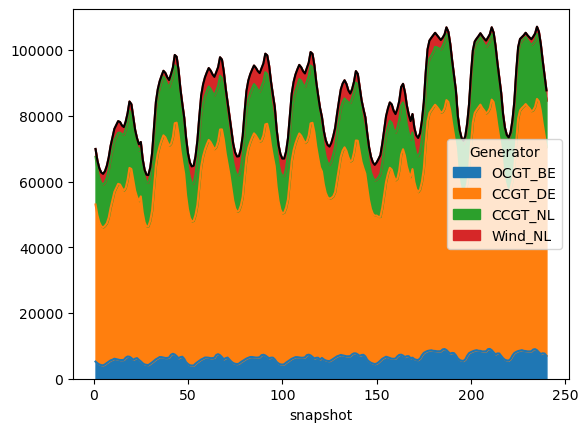

In [184]:
#Plot the resulting total generation, and load
s=0
e=240
ax = n.generators_t.p.loc[s:e].plot.area(stacked = True)
n.loads_t.p_set.sum(axis=1)[s:e].plot(ax = ax,c="black")

C:\Users\u0138303\AppData\Local\Temp\ipykernel_5824\3358663014.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generation["NetImport"] = net_imp


<Axes: xlabel='snapshot'>

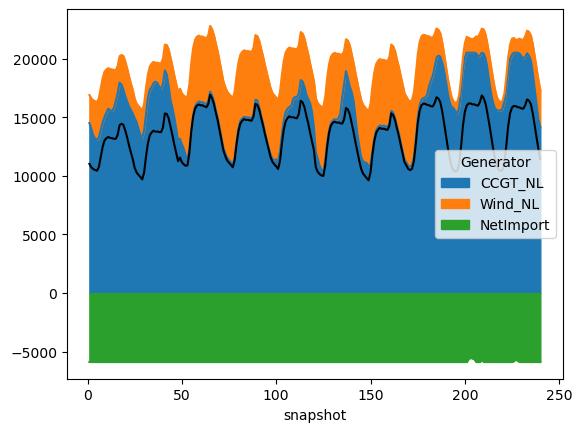

In [211]:
#Plot the resulting generation+import-export, and load- at a single node 
s=0
e=240
node = "NL"
net_imp = -n.lines_t.p0[n.lines[n.lines.bus0 == node].index].sum(axis = 1) - n.lines_t.p1[n.lines[n.lines.bus1 == node].index].sum(axis = 1)
generation = generation = n.generators_t.p.filter(like = node)
generation["NetImport"] = net_imp
ax = generation.loc[s:e].plot.area(stacked = True)
n.loads_t.p_set[node][s:e].plot(ax = ax,c="black")

In [204]:
generation = n.generators_t.p.filter(like = node)
generation["NetImport"] = net_imp
generation

C:\Users\u0138303\AppData\Local\Temp\ipykernel_5824\913546207.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generation["NetImport"] = net_imp


Generator,OCGT_BE,NetImport
snapshot,,
1,5211.82,-3400.0
2,4707.02,-3400.0
3,4340.83,-3400.0
4,4145.34,-3400.0
5,4055.00,-3400.0
...,...,...
8756,6472.52,-3400.0
8757,5964.93,-3400.0
8758,6194.45,-3400.0


In [195]:
n.lines_t.p0[n.lines[n.lines.bus0 == node].index]
n.lines_t.p1[n.lines[n.lines.bus1 == node].index]

Line
snapshot
1
2
3
4
5
...
8756
8757
8758


In [193]:
n.lines[n.lines.bus0 == node].index

Index(['L1', 'L2'], dtype='object', name='Line')